In [1]:
#from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
#from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)

keras version  2.10.0


In [4]:
df1 = pd.read_csv("data/Simple man 1.csv")
df2 = pd.read_csv("data/Simple man 2.csv")

df3 = pd.read_csv("data/Disco inferno 1.csv")
df4 = pd.read_csv("data/Disco inferno 2.csv")

df5 = pd.read_csv("data/billie jean 1.csv")
df6 = pd.read_csv("data/billie jean 2.csv")

df7 = pd.read_csv("data/Smooth criminal 1.csv")
df8 = pd.read_csv("data/Smooth criminal 2.csv")
df9 = pd.read_csv("data/Smooth criminal 3.csv")

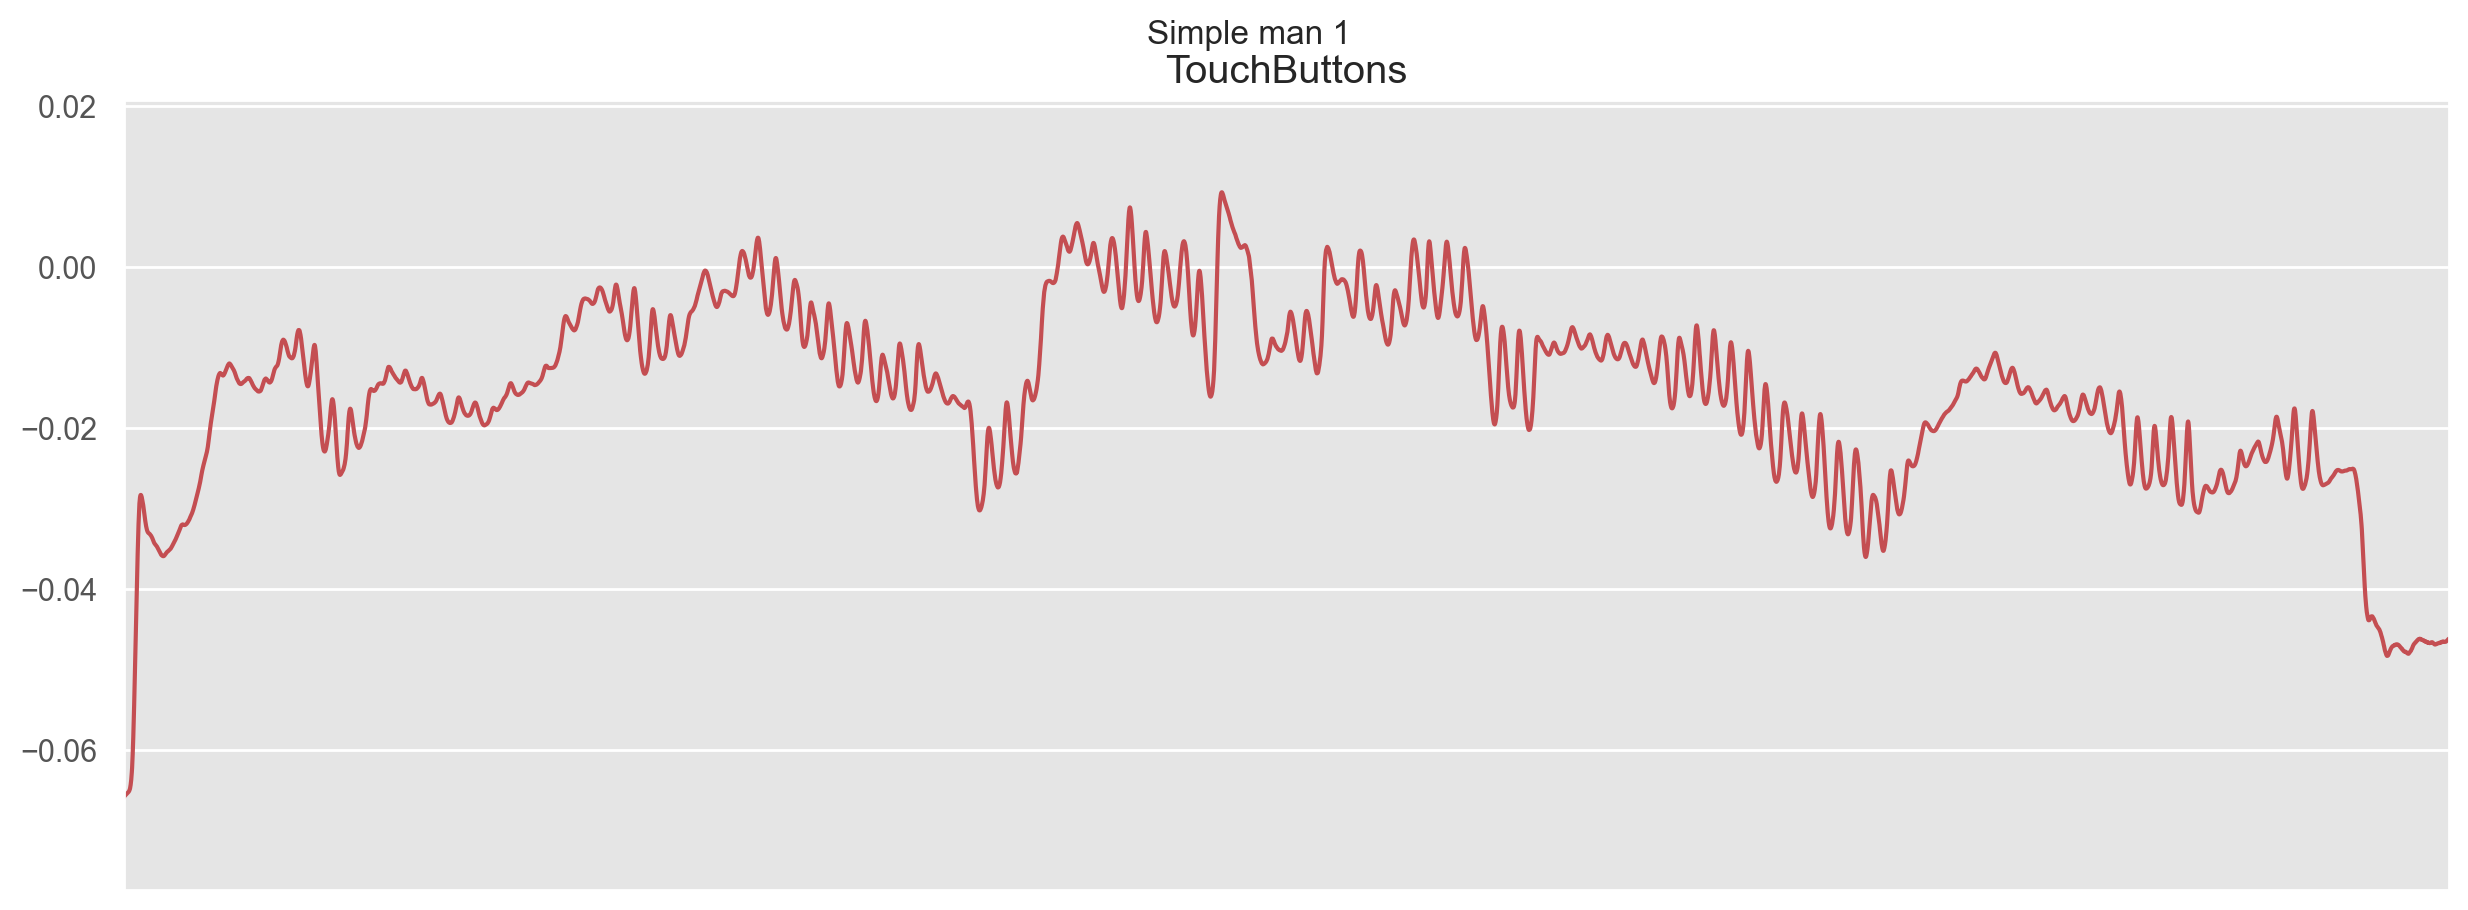

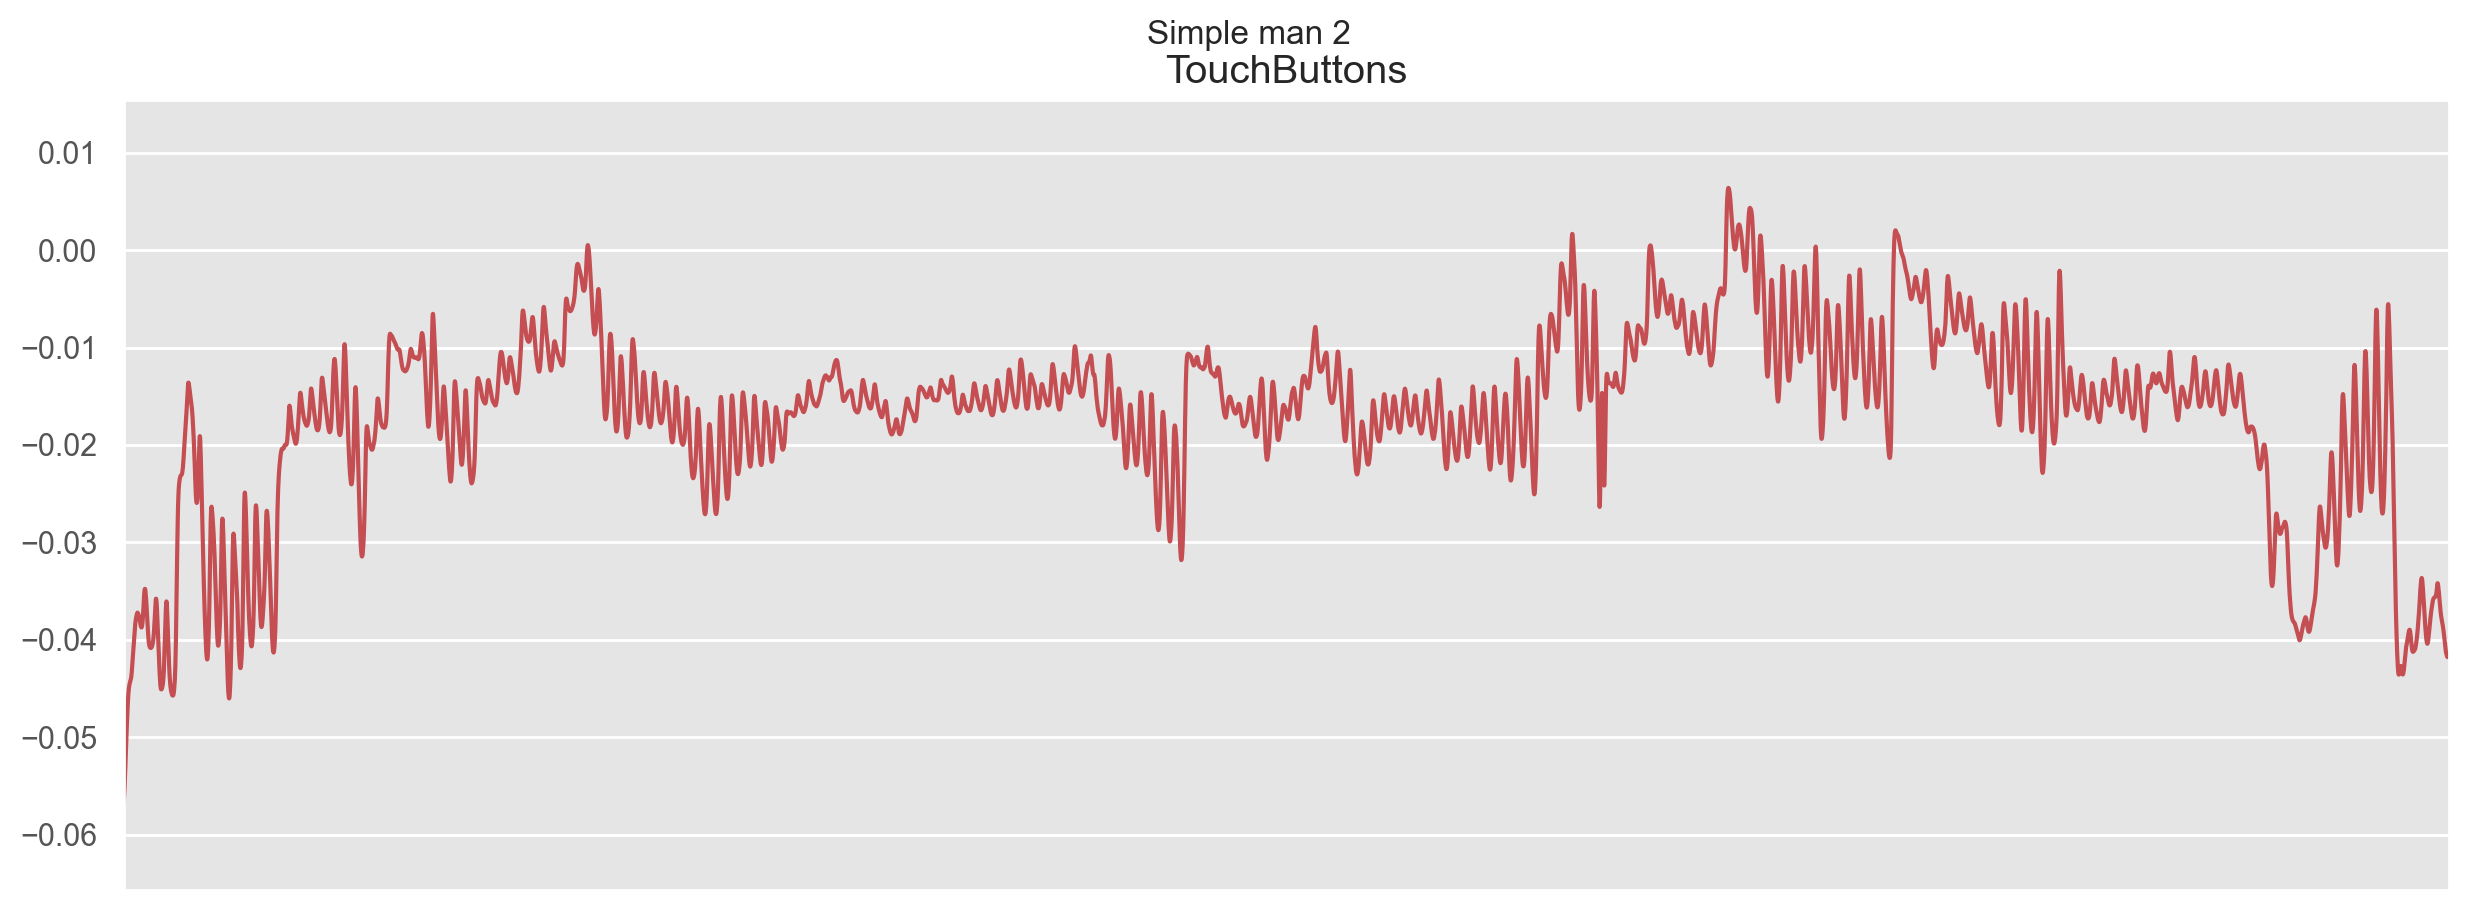

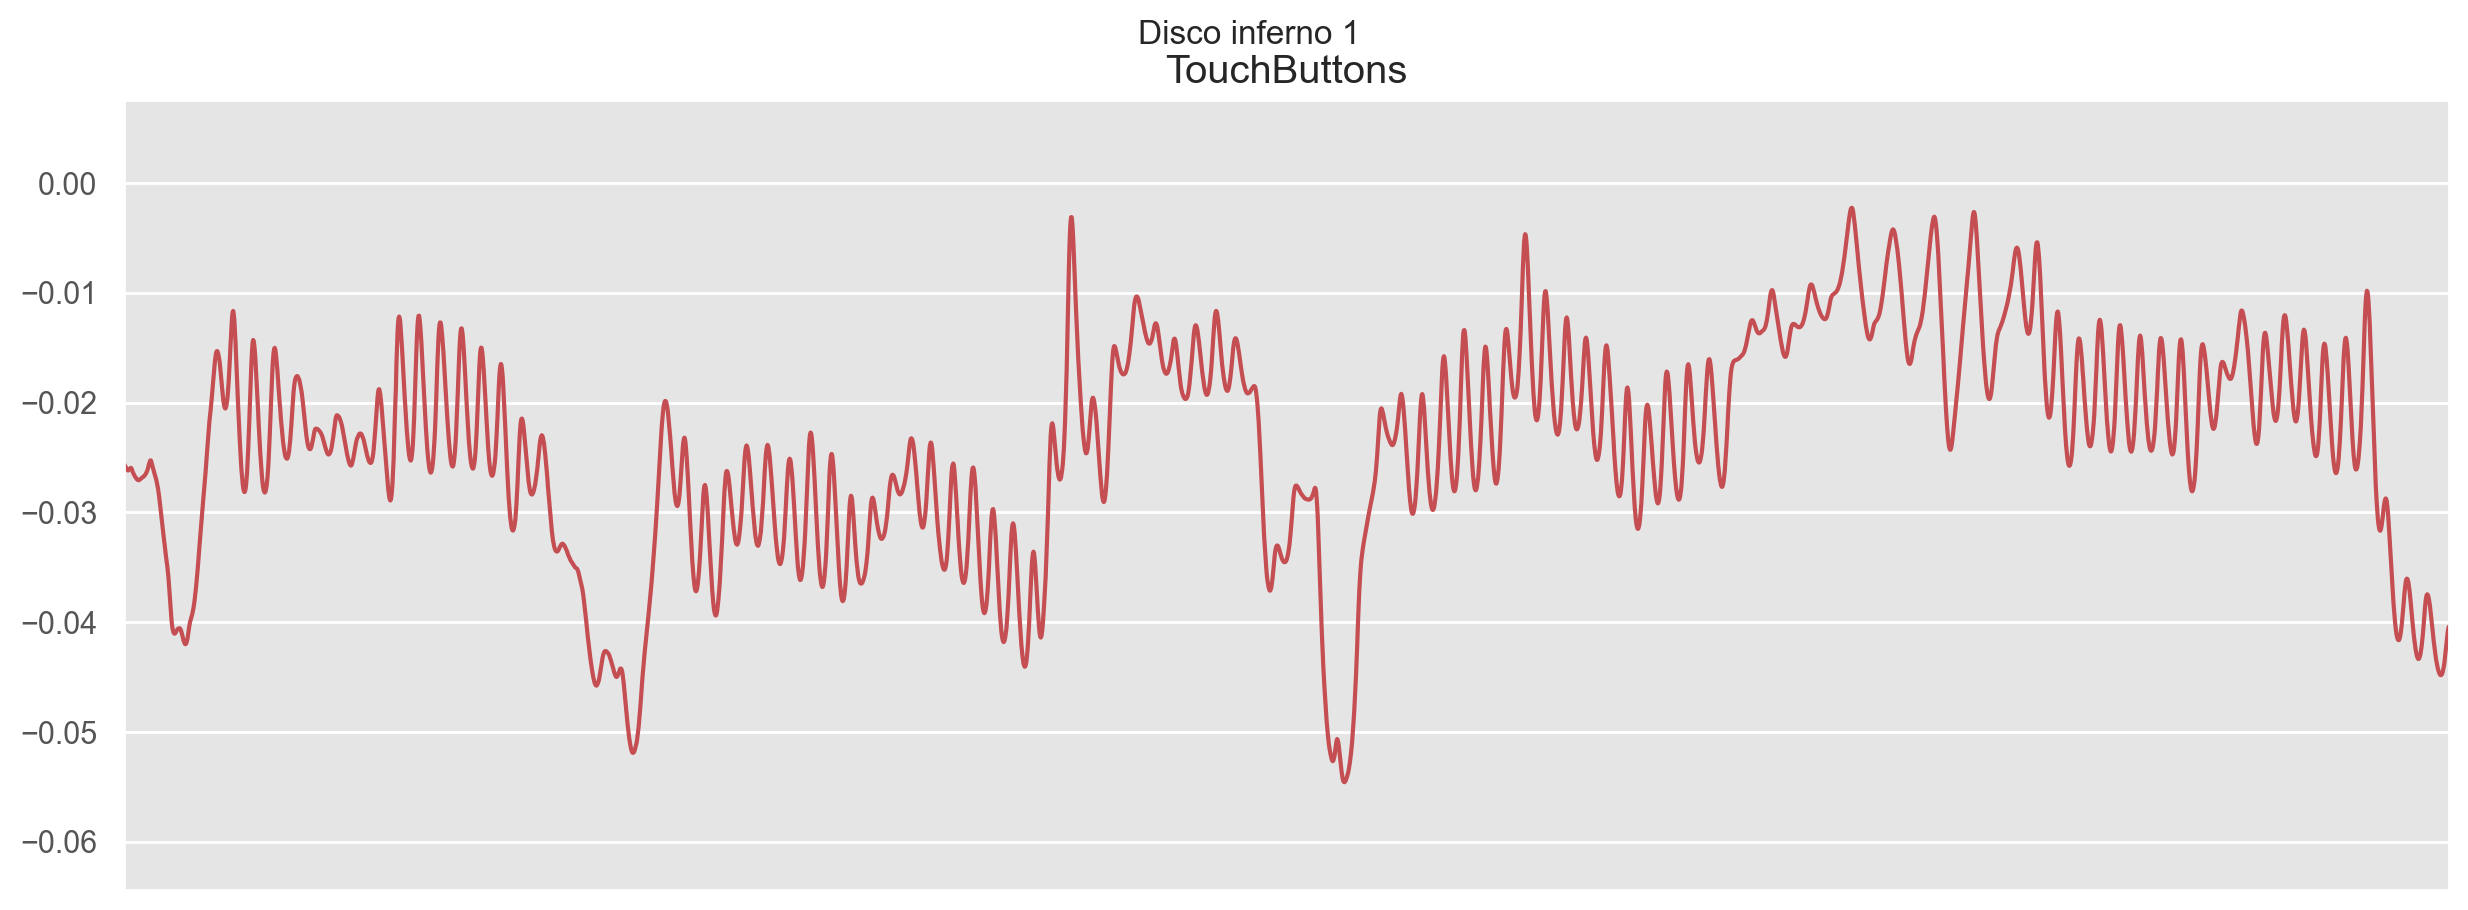

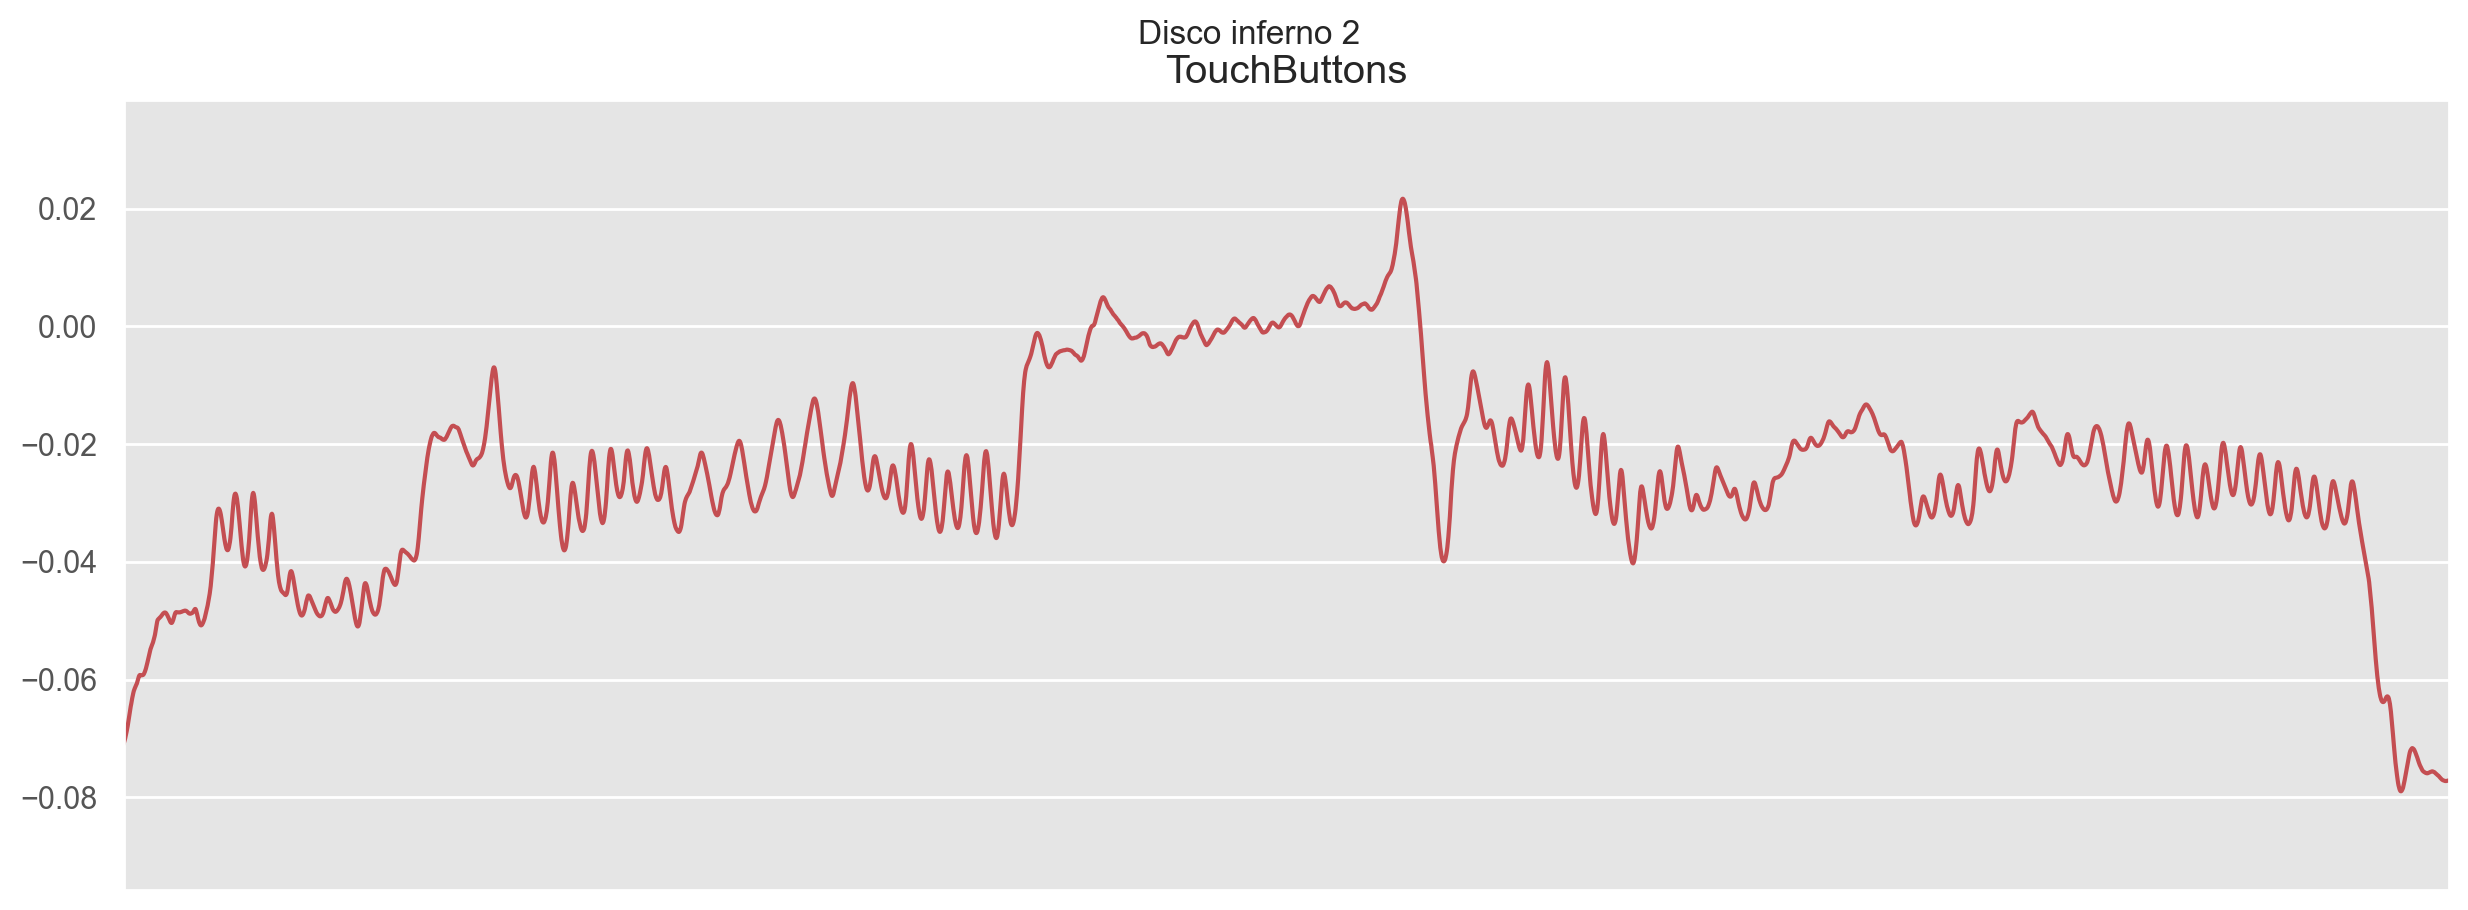

In [5]:
def plot_activity(activity, data):

    fig, (ax0) = plt.subplots(nrows=1,
         figsize=(15, 5),
         sharex=True)
    plot_axis(ax0, data['Time'], data['HeadPosX'], 'TouchButtons')
    #plot_axis(ax1, data['Time'], data['HeadOrientationY'], 'HeadOrientationY')
    #plot_axis(ax2, data['Time'], data['HeadOrientationZ'], 'HeadOrientationZ')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

plot_activity("Simple man 1", df1)
plot_activity("Simple man 2", df2)
plot_activity("Disco inferno 1", df3)
plot_activity("Disco inferno 2", df4)

Let's calculate the speed

In [6]:
def calculate_speeds(positions_over_time):
    time = 'Time'

    movements_over_timesteps = (
        np.roll(positions_over_time, -1, axis=0)
        - positions_over_time)[:-1]

    speeds = np.sqrt(
        movements_over_timesteps.HeadPosX ** 2 +
        movements_over_timesteps.HeadPosY ** 2 +
        movements_over_timesteps.HeadPosZ ** 2
    ) / movements_over_timesteps[time]

    return pd.DataFrame({
        time: positions_over_time[time][:-1],
        'Speed': speeds,
    })

#data = data.iloc[100: 500]

In [7]:
def plot_df(data):
    fig, (ax0) = plt.subplots(nrows=1,
             figsize=(15, 5),
             sharex=True)
    plot_axis(ax0, data['Time'], data['Speed'], 'Speed')
    ax0.plot(data['Time'], data['Speed'], 'r')
    ax0.set_title('Speed')
    ax0.xaxis.set_visible(False)
    ax0.set_ylim([min(data['Speed']) - np.std(data['Speed']), max(data['Speed']) + np.std(data['Speed'])])
    ax0.set_xlim([min(data['Time']), max(data['Time'])])
    ax0.grid(True)
    
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle("speed ")
    plt.subplots_adjust(top=0.90)
    plt.show()
    

In [8]:
# Labels to classify the music
LABELS = ['Rap',
         'Rock',
         'Pop']

# The number of steps within one segment
TIME_PERIODS = 240

# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 120

Now we want to add labels to the data

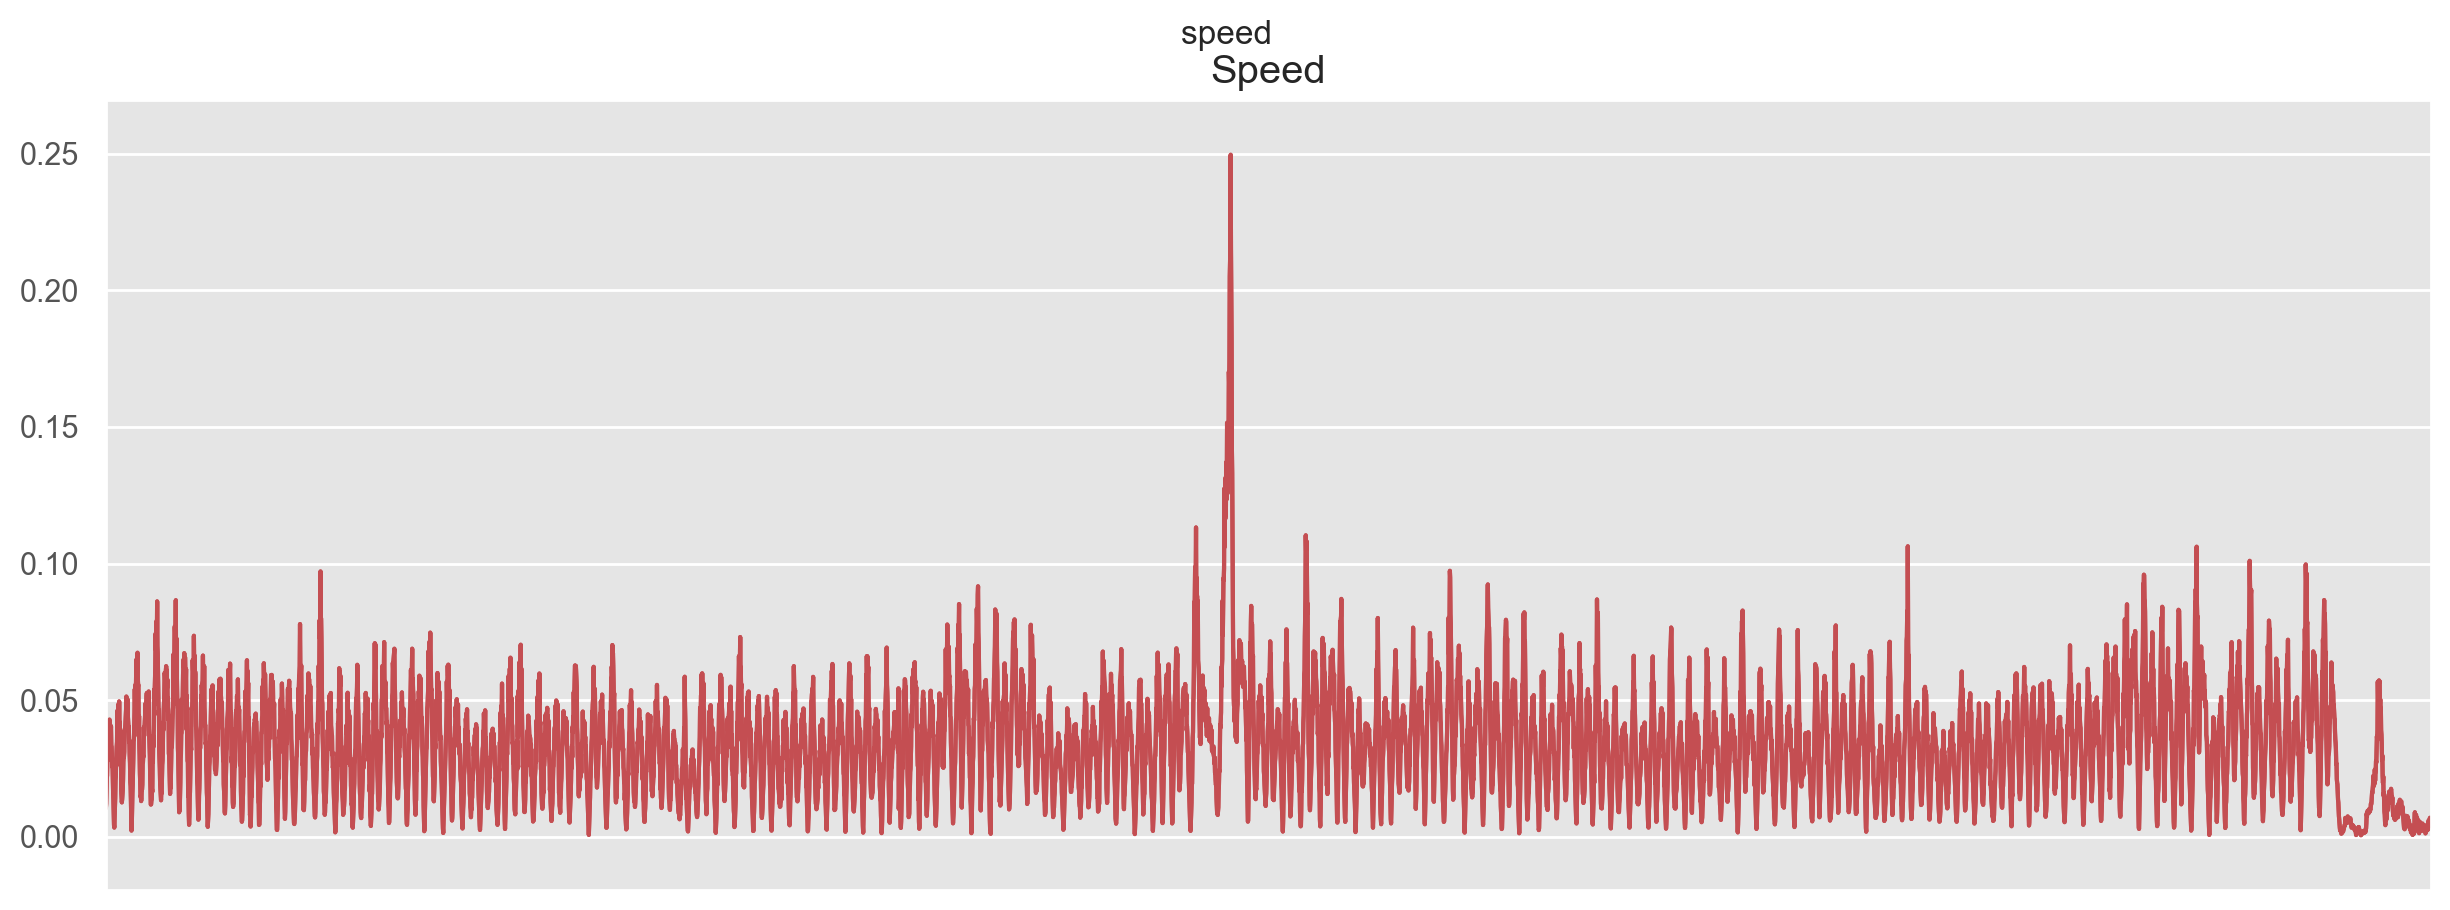

In [9]:
data1 = calculate_speeds(df1)
plot_df(data1.iloc[120:-120])

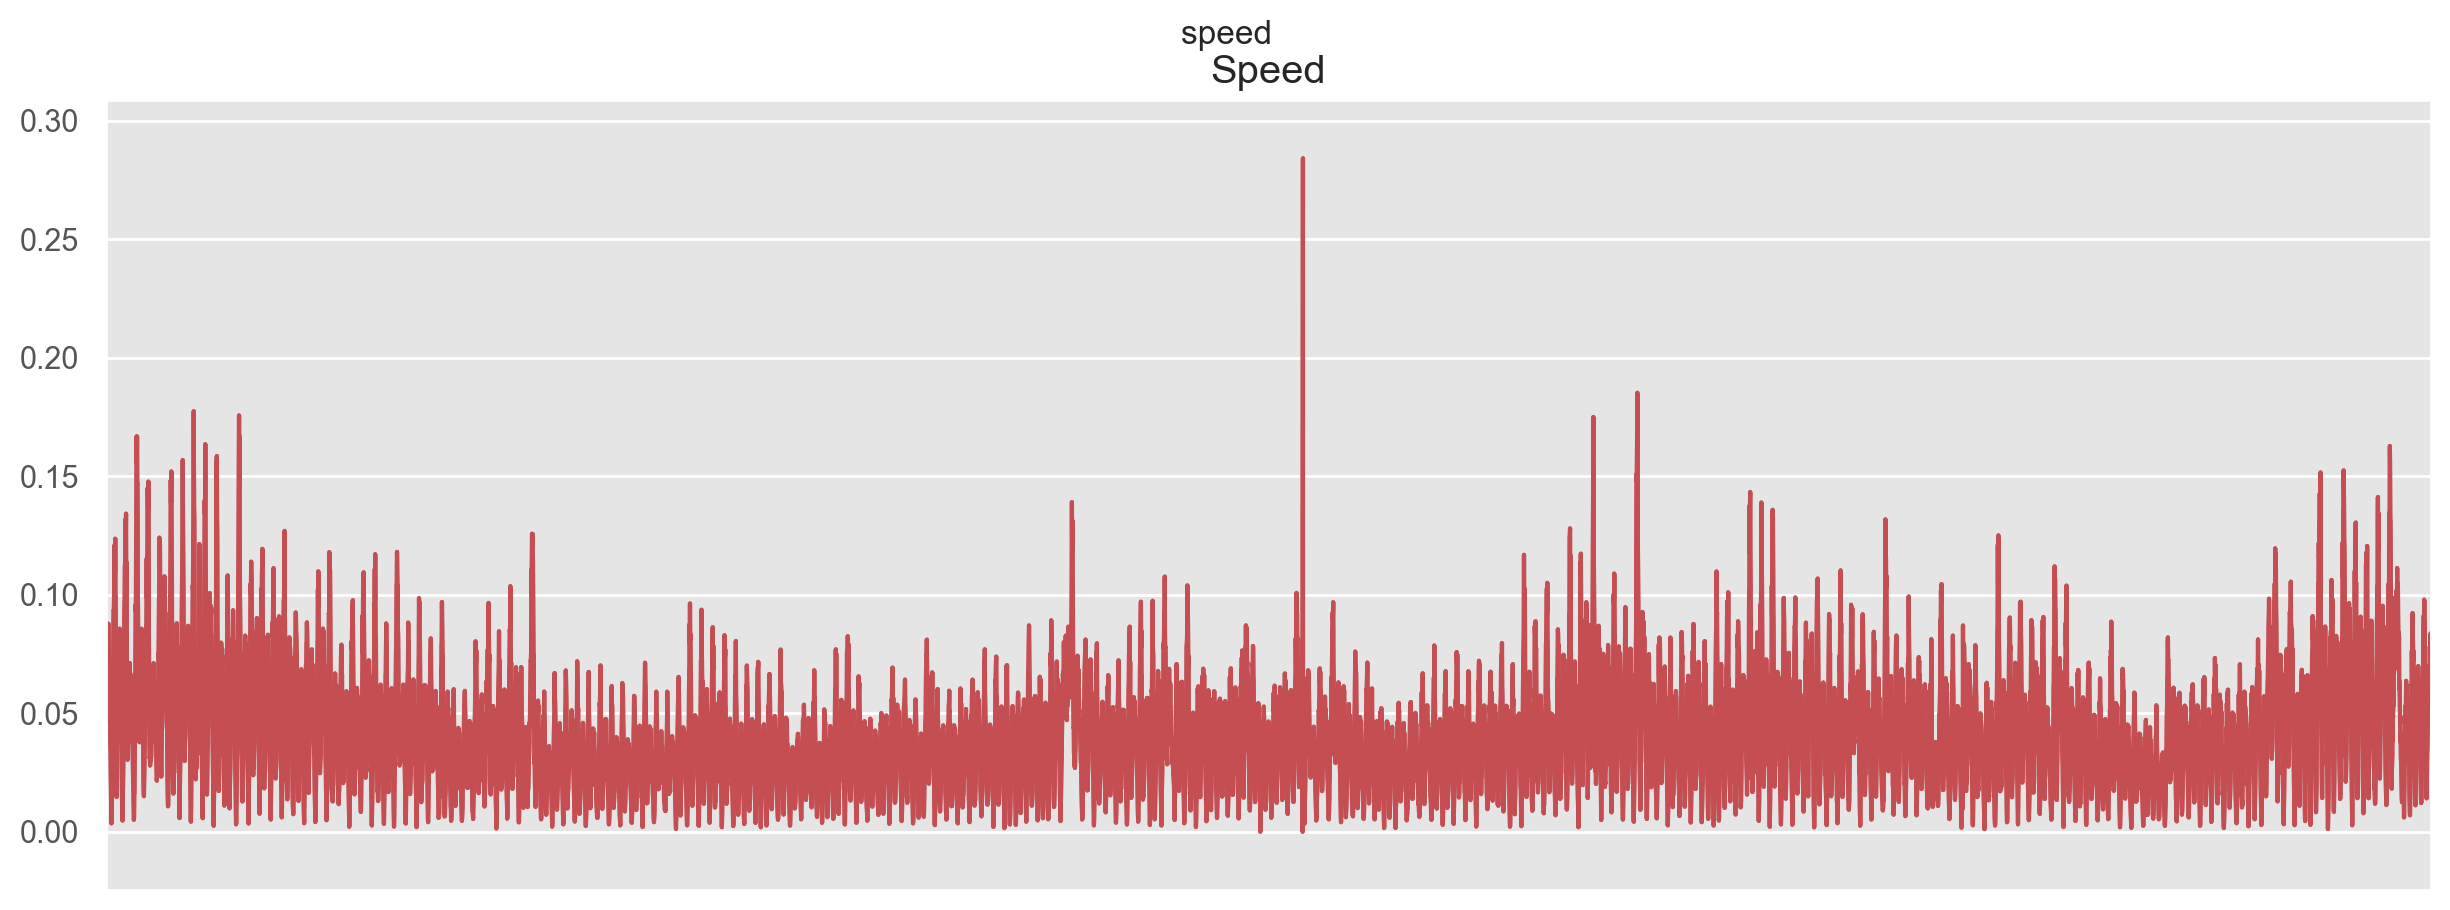

In [10]:
data2 = calculate_speeds(df2)
plot_df(data2.iloc[120:-120])

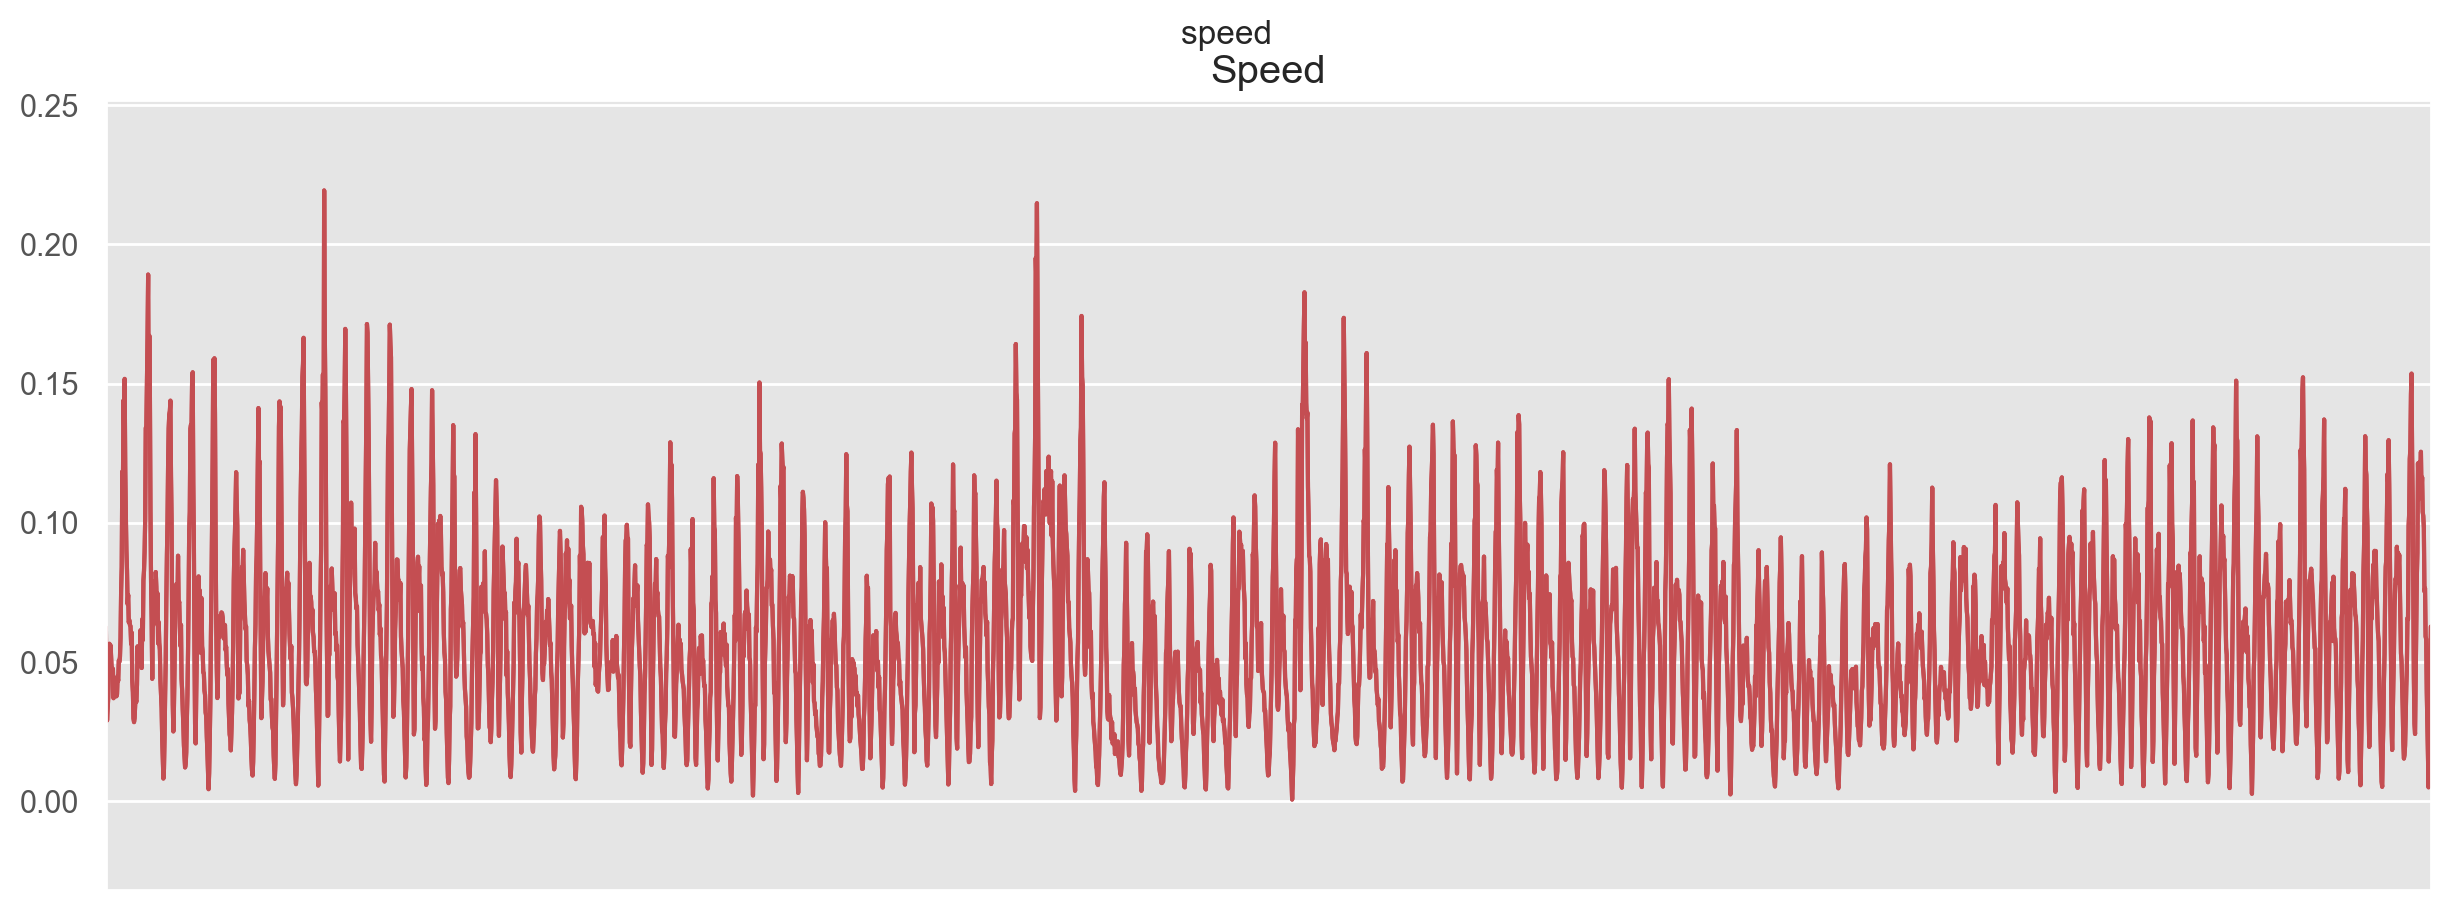

In [11]:
data3 = calculate_speeds(df3)
plot_df(data3.iloc[120:-120])

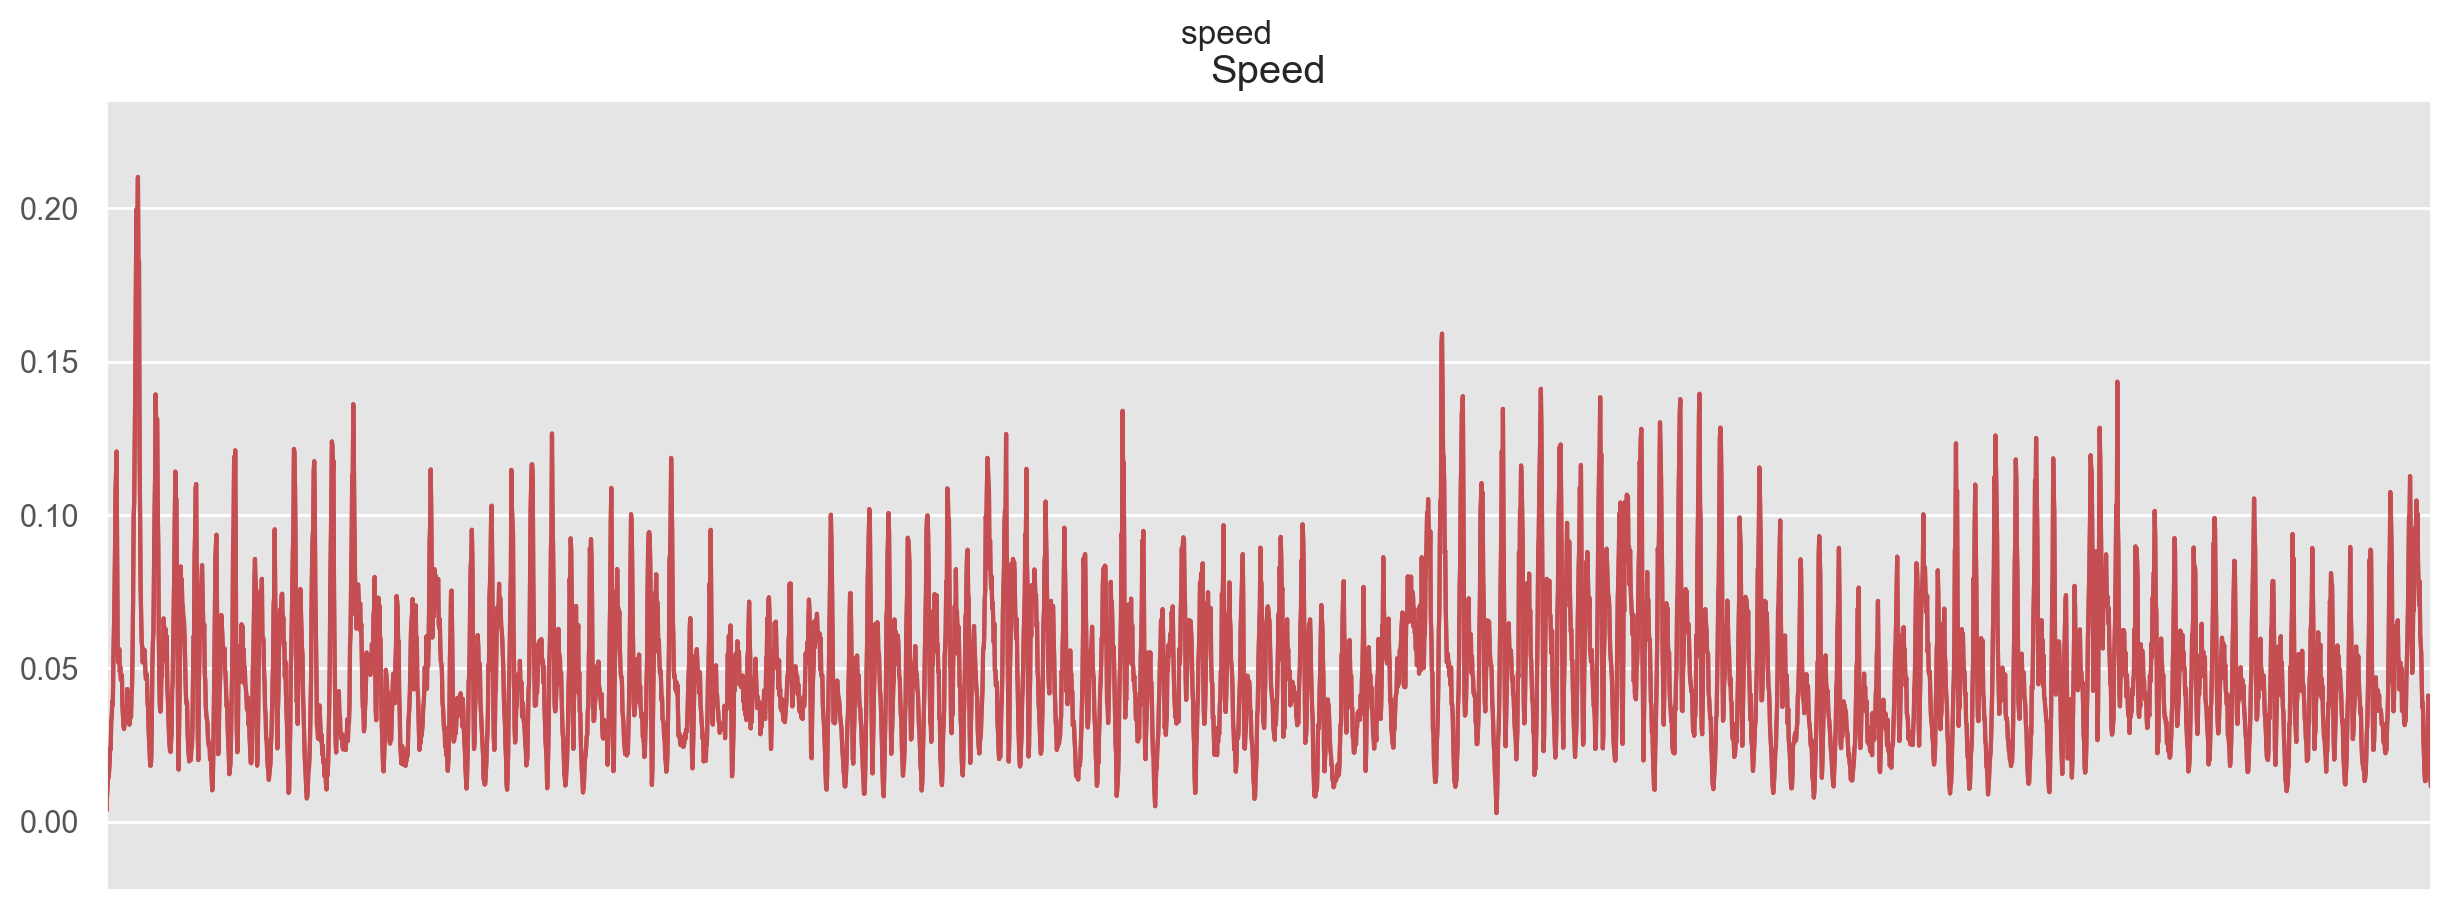

In [12]:
data4 = calculate_speeds(df4)
plot_df(data4.iloc[120:-120])

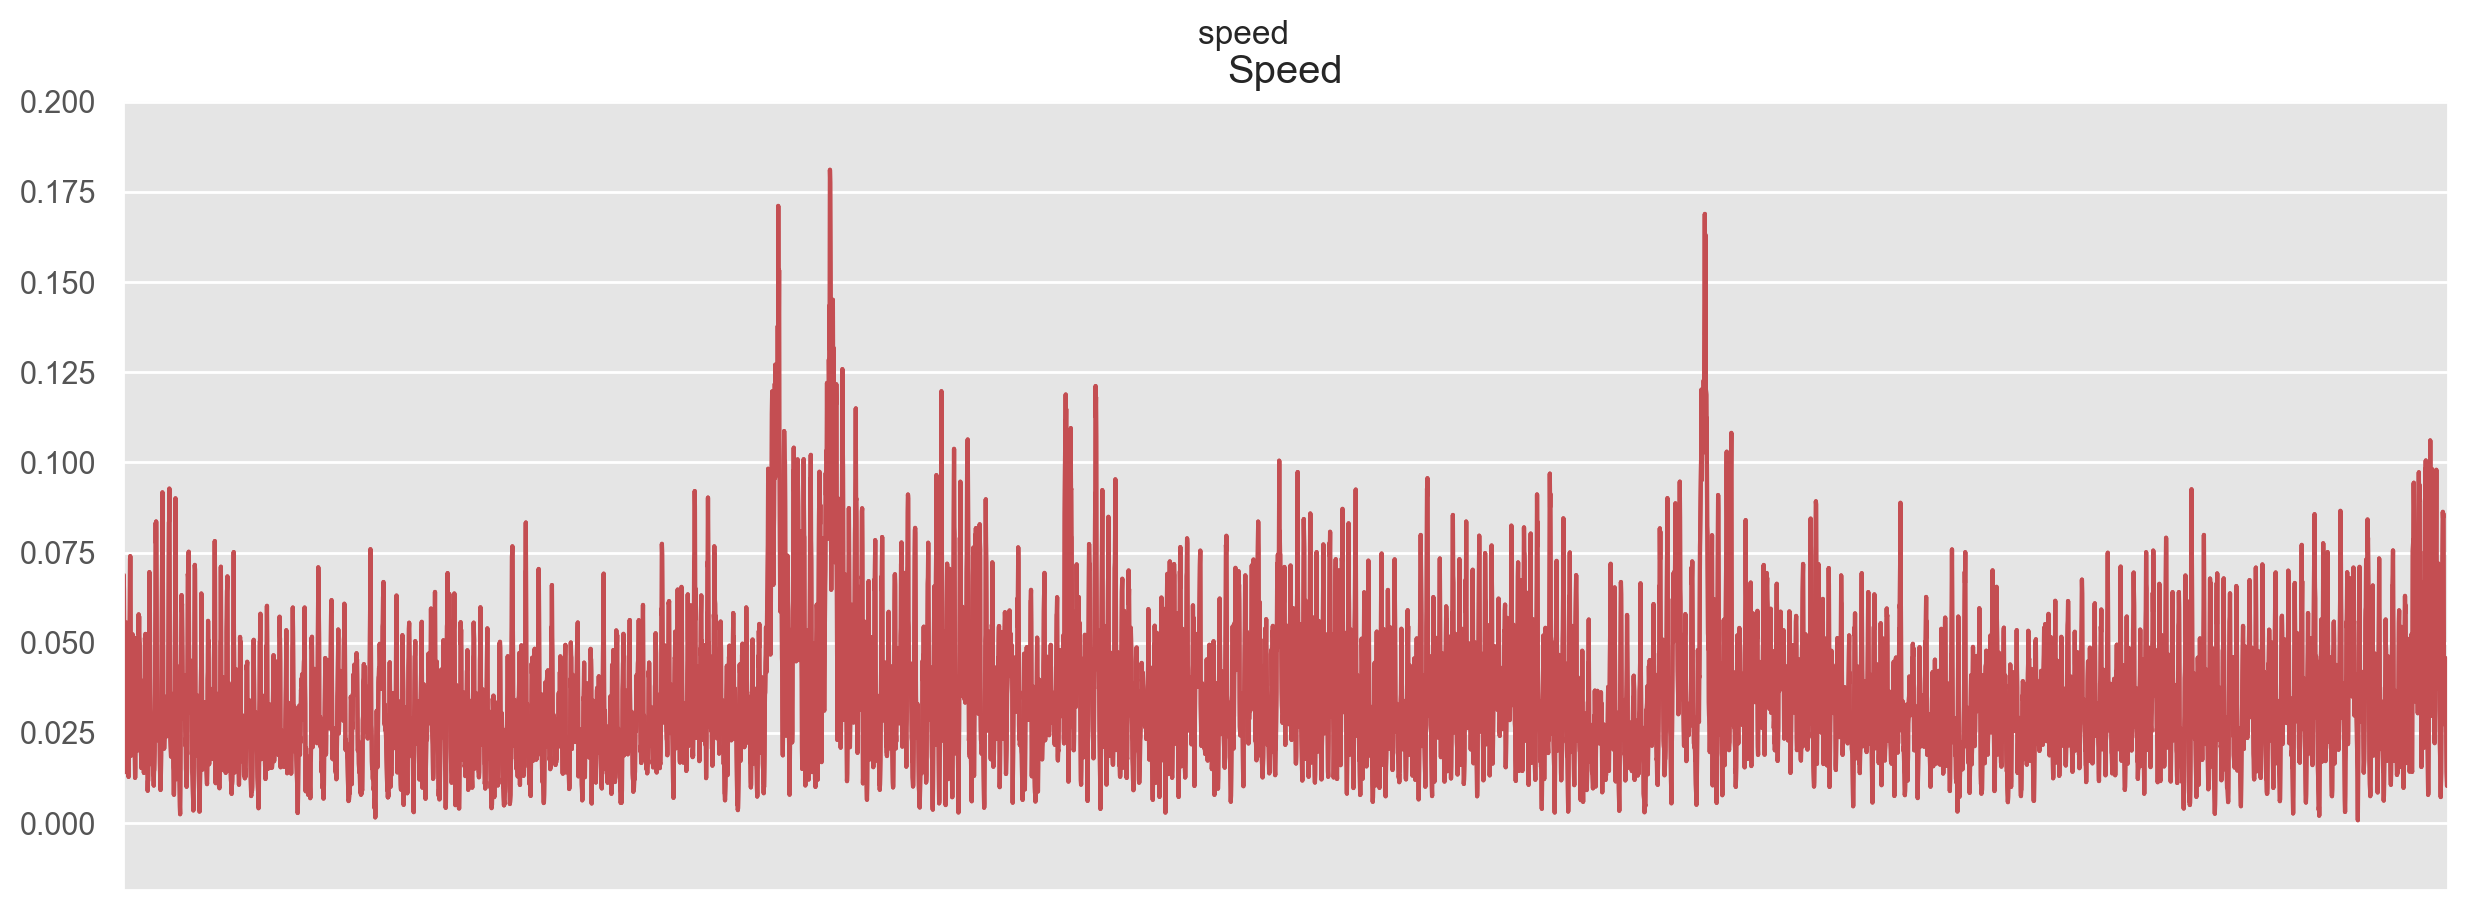

In [13]:
data5 = calculate_speeds(df5)
plot_df(data5.iloc[120:-120])

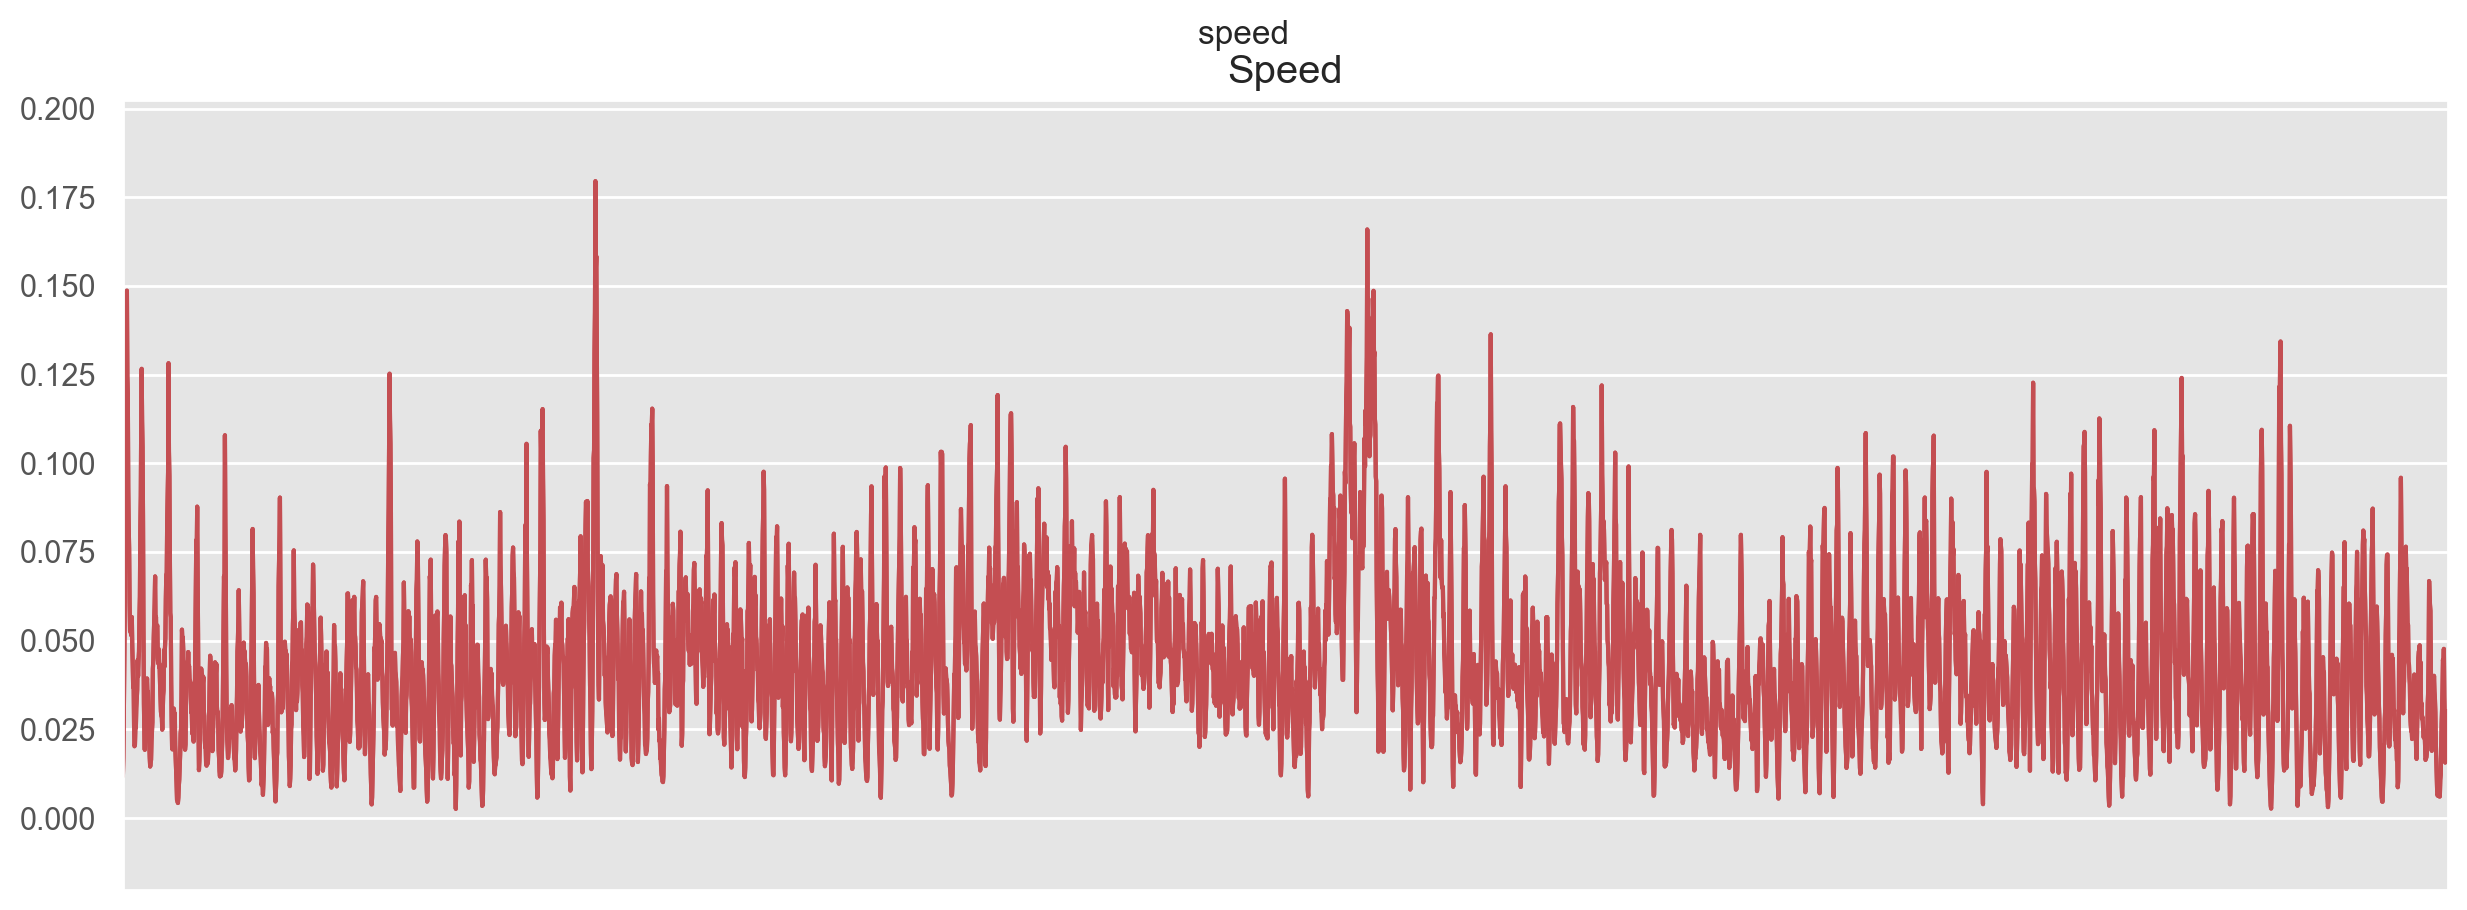

In [14]:
data6 = calculate_speeds(df6)
plot_df(data6.iloc[120:-120])

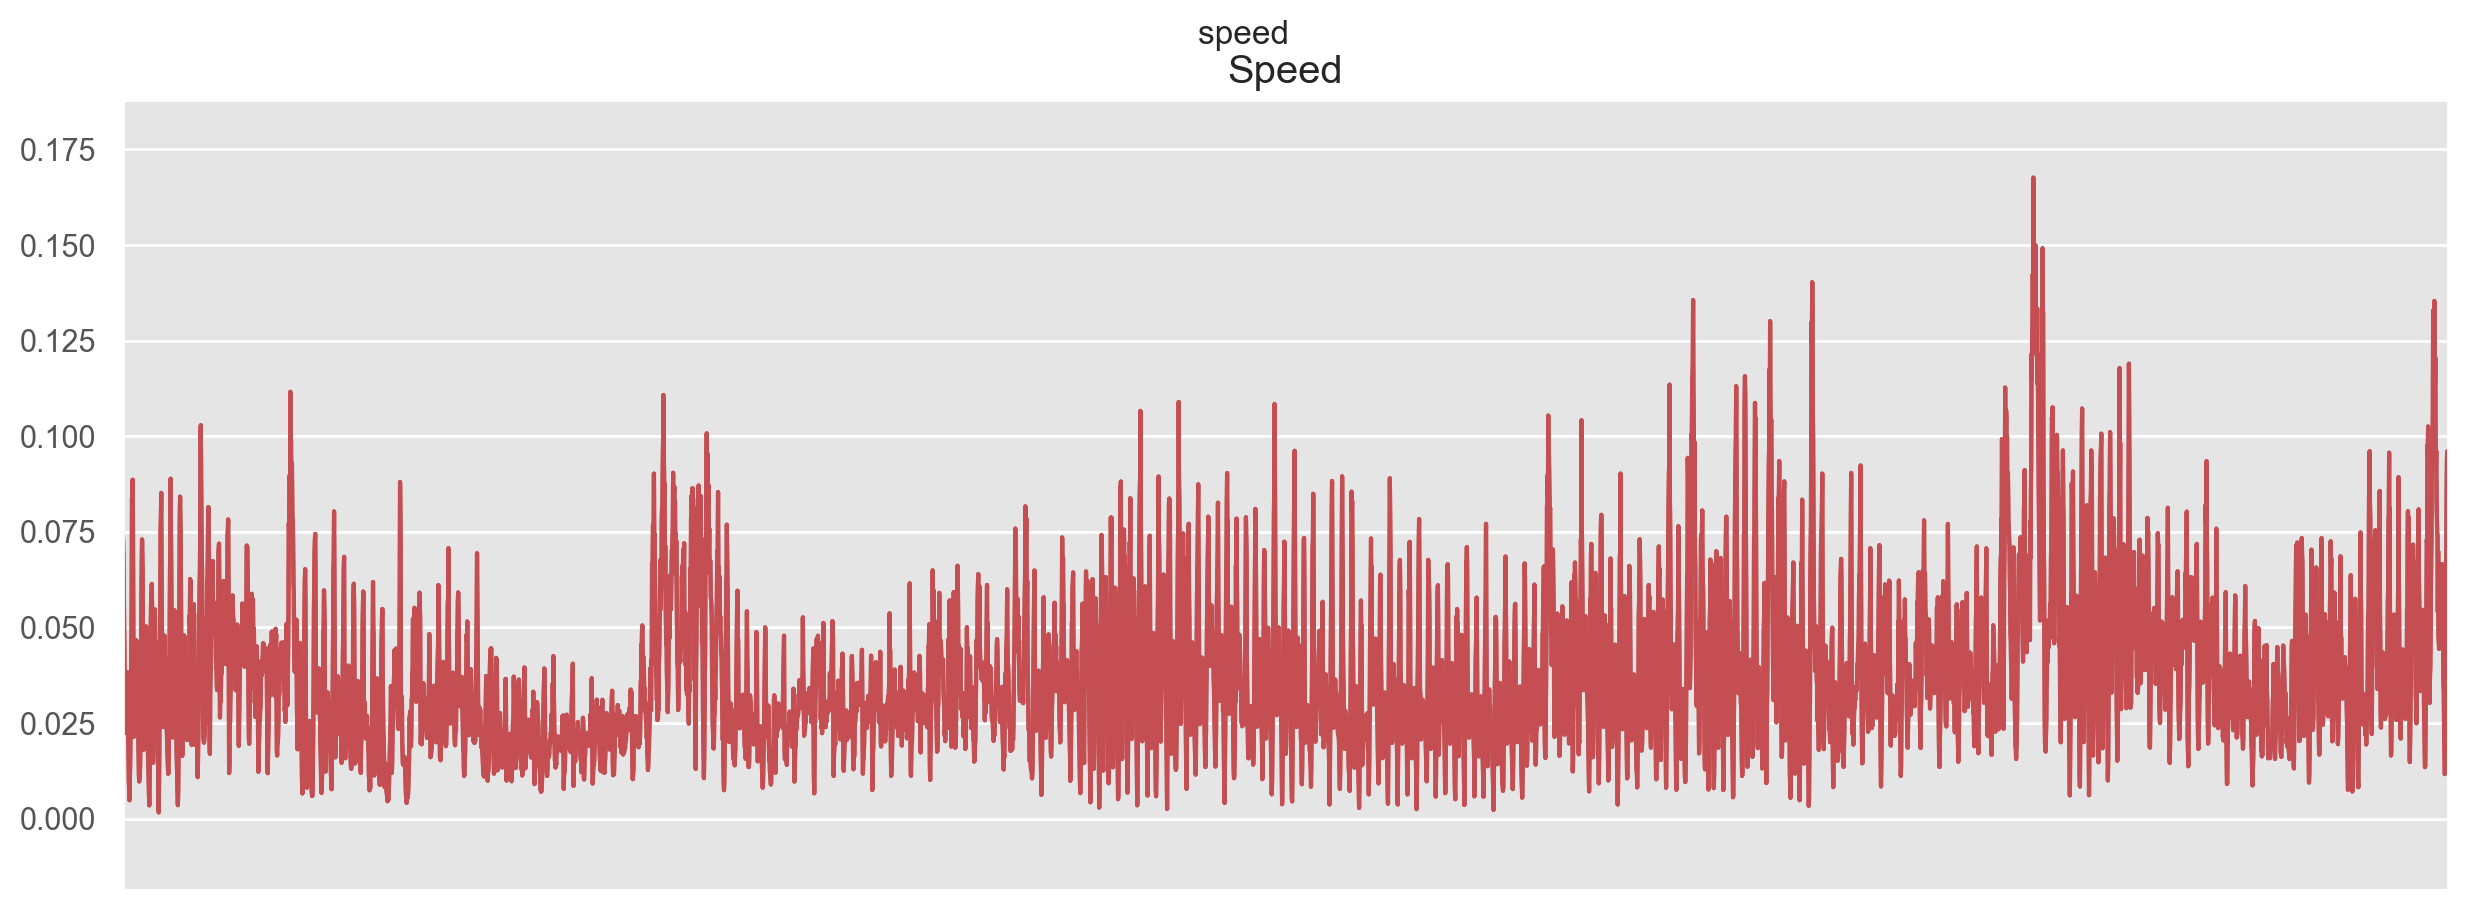

In [15]:
data7 = calculate_speeds(df7)
plot_df(data7.iloc[120:-120])

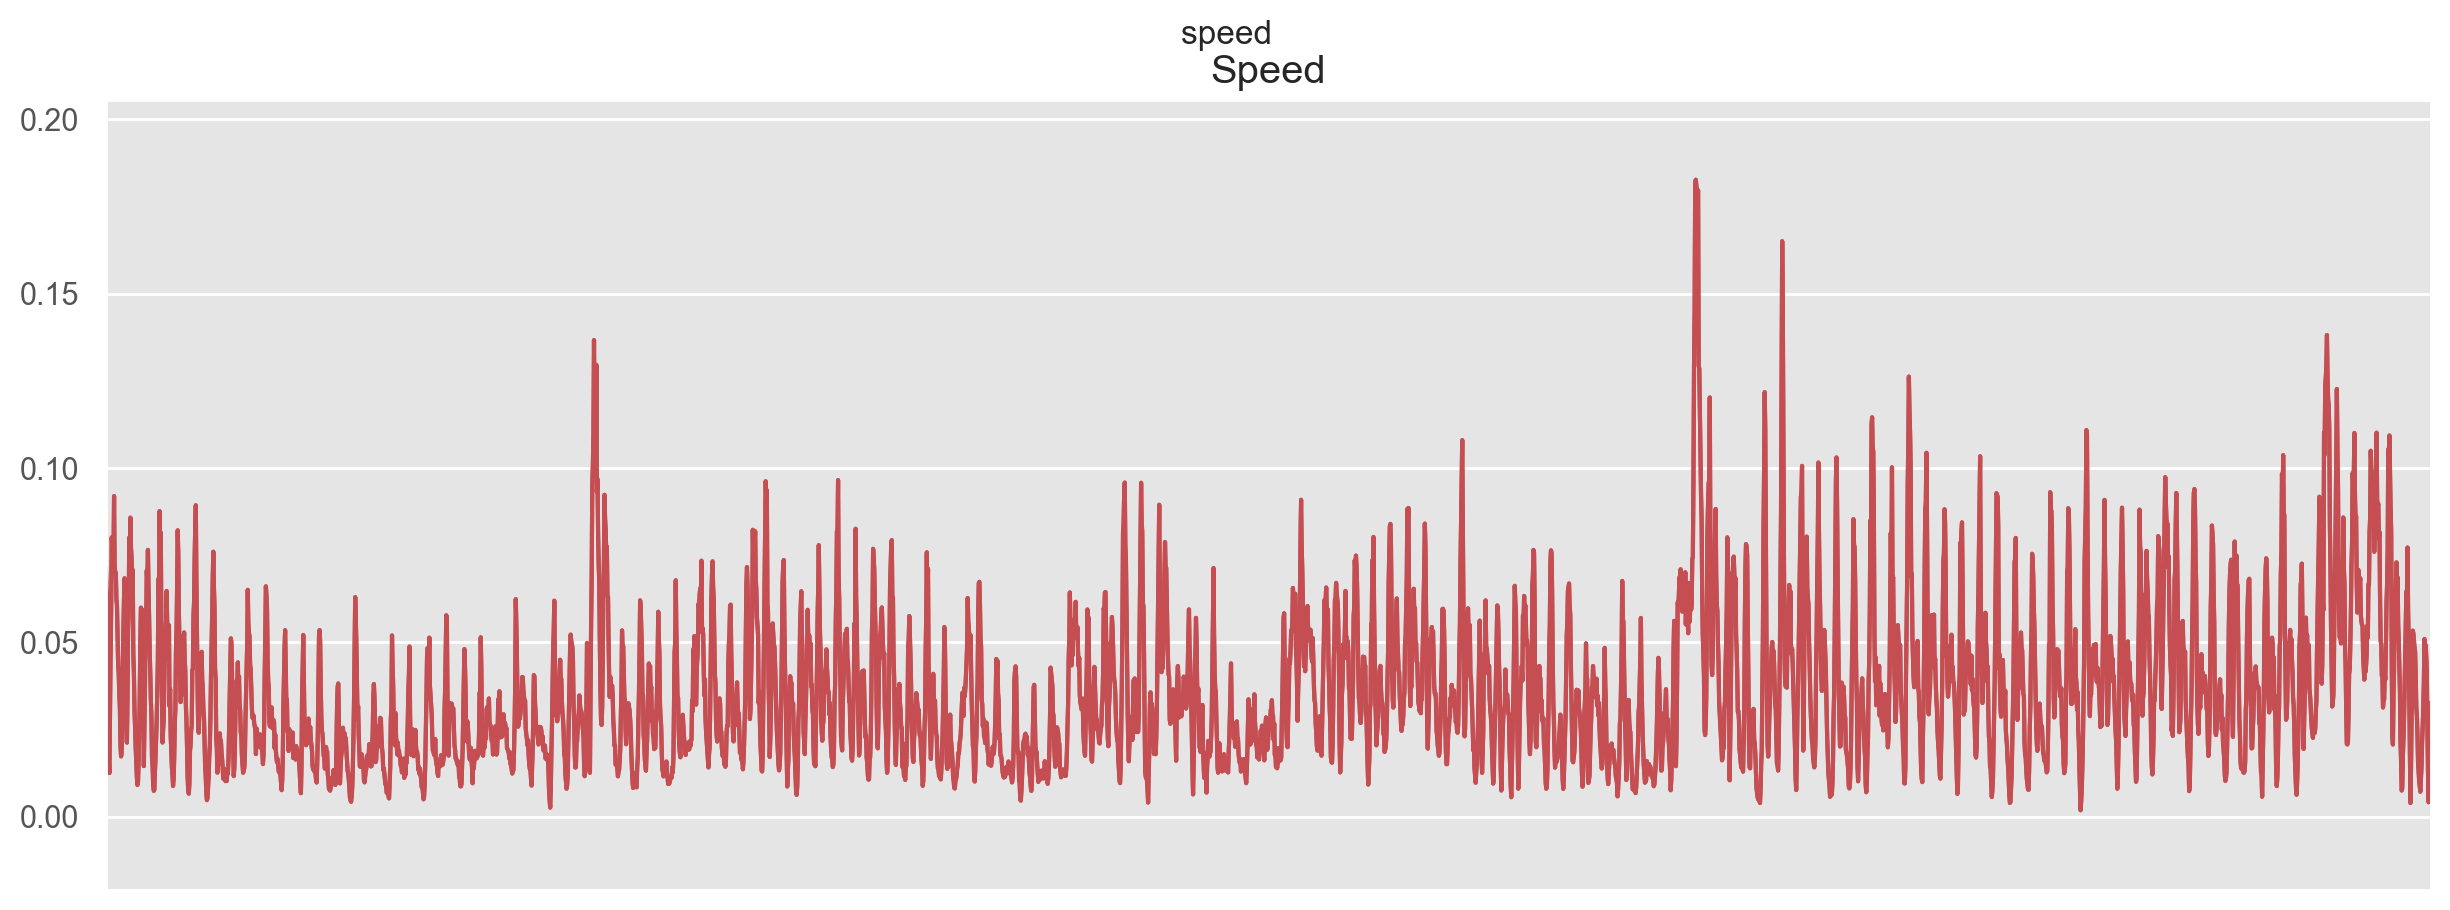

In [16]:
data8 = calculate_speeds(df8)
plot_df(data8.iloc[120:-120])

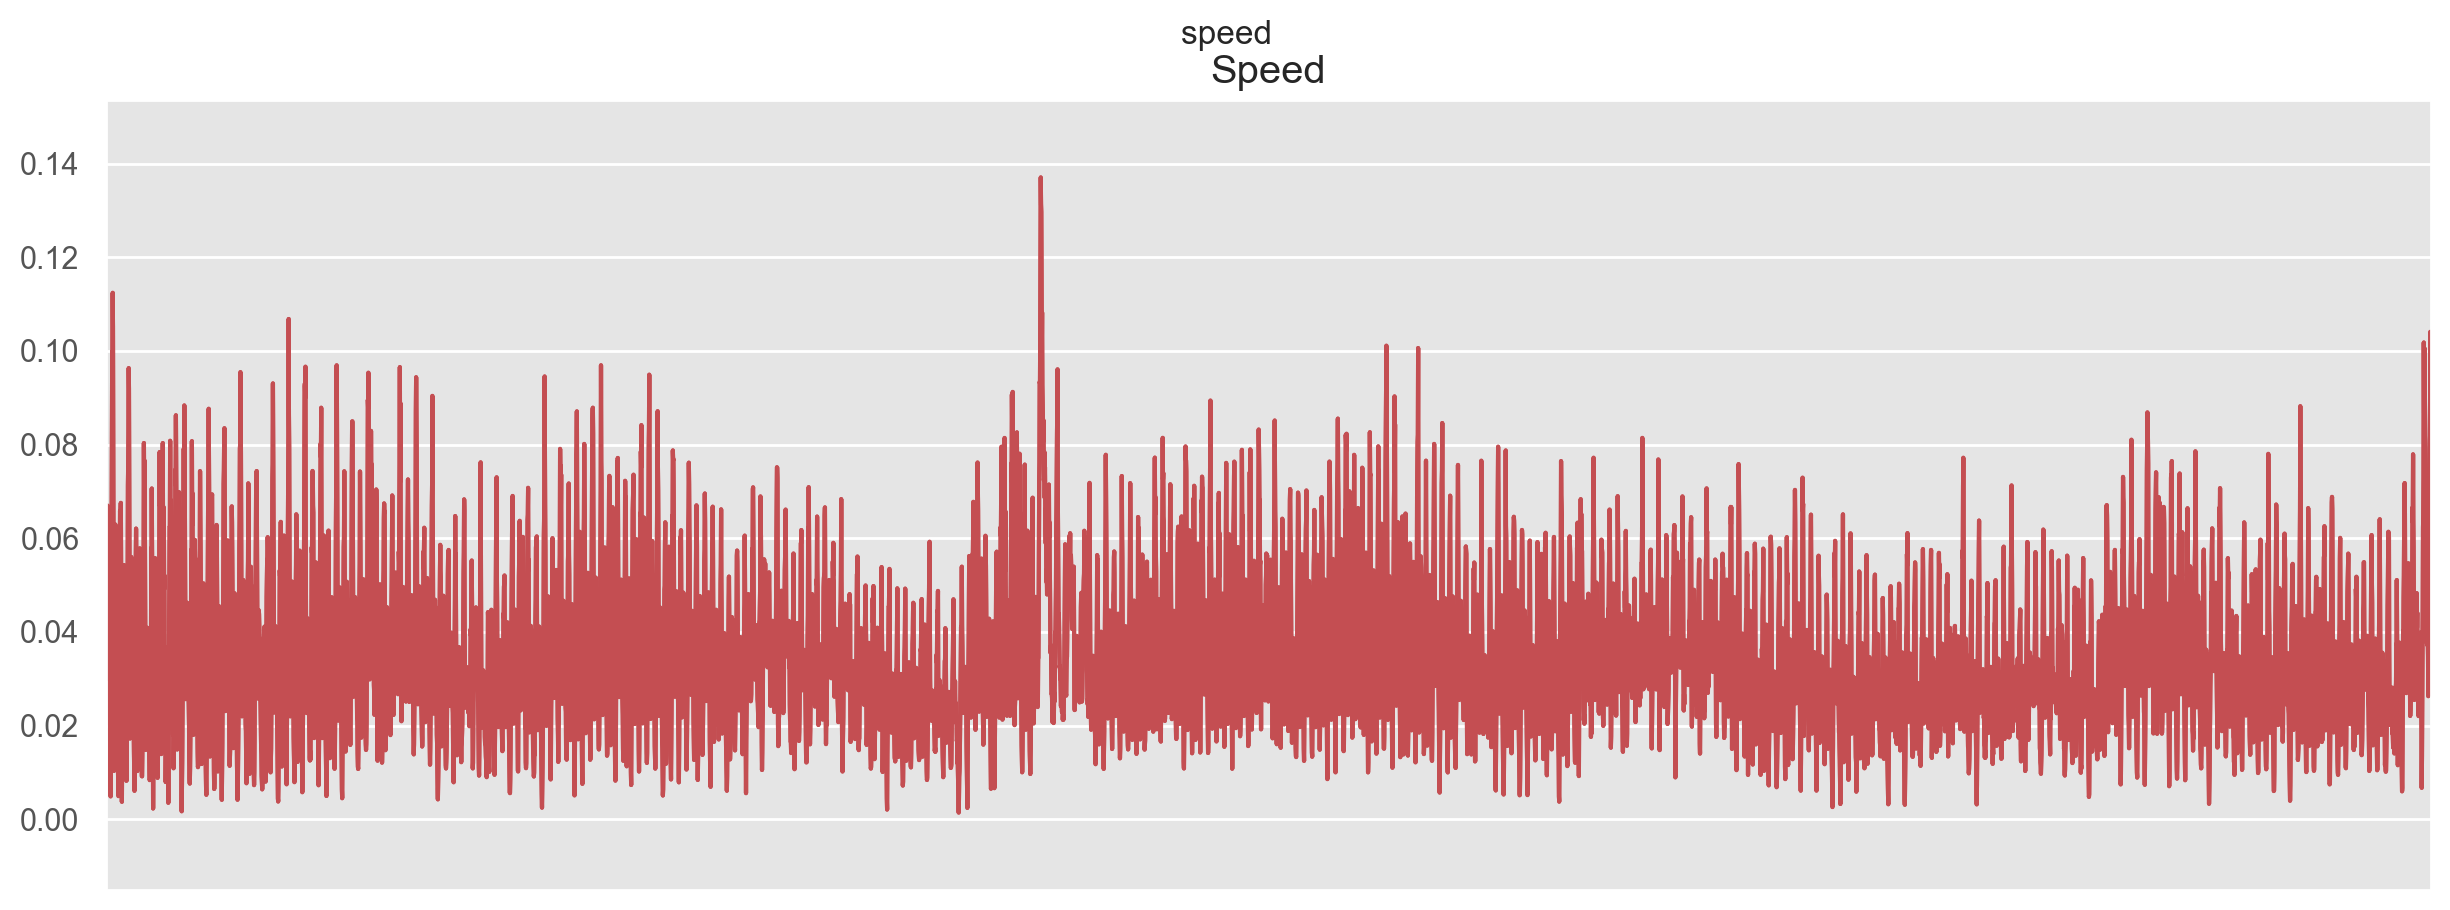

In [17]:
data9 = calculate_speeds(df9)
plot_df(data9.iloc[180:-180])

In [18]:
data1['Type'] = 'Rock'
data2['Type'] = 'Rock'
data3['Type'] = 'Rap'
data4['Type'] = 'Rap'

data5['Type'] = 'Pop'
data6['Type'] = 'Pop'
data7['Type'] = 'Pop'
data8['Type'] = 'Pop'
data9['Type'] = 'Pop'

In [19]:
datas = []
datas.append(data1)
datas.append(data2)
datas.append(data3)
datas.append(data4)
datas.append(data5)
datas.append(data6)
#datas.append(data7)
#datas.append(data8)
#datas.append(data9)


In [20]:
data = pd.concat(datas, ignore_index=True)

In [21]:
data

Time  Speed  Type
0       0.0    0.0  Rock
1       0.0    0.0  Rock
2       0.1    0.0  Rock
3       0.1    0.0  Rock
4       0.1    0.0  Rock
...     ...    ...   ...
46185  90.6    0.0   Pop
46186  90.6    0.0   Pop
46187  90.7    0.0   Pop
46188  90.7    0.0   Pop
46189  90.7    0.0   Pop

[46190 rows x 3 columns]

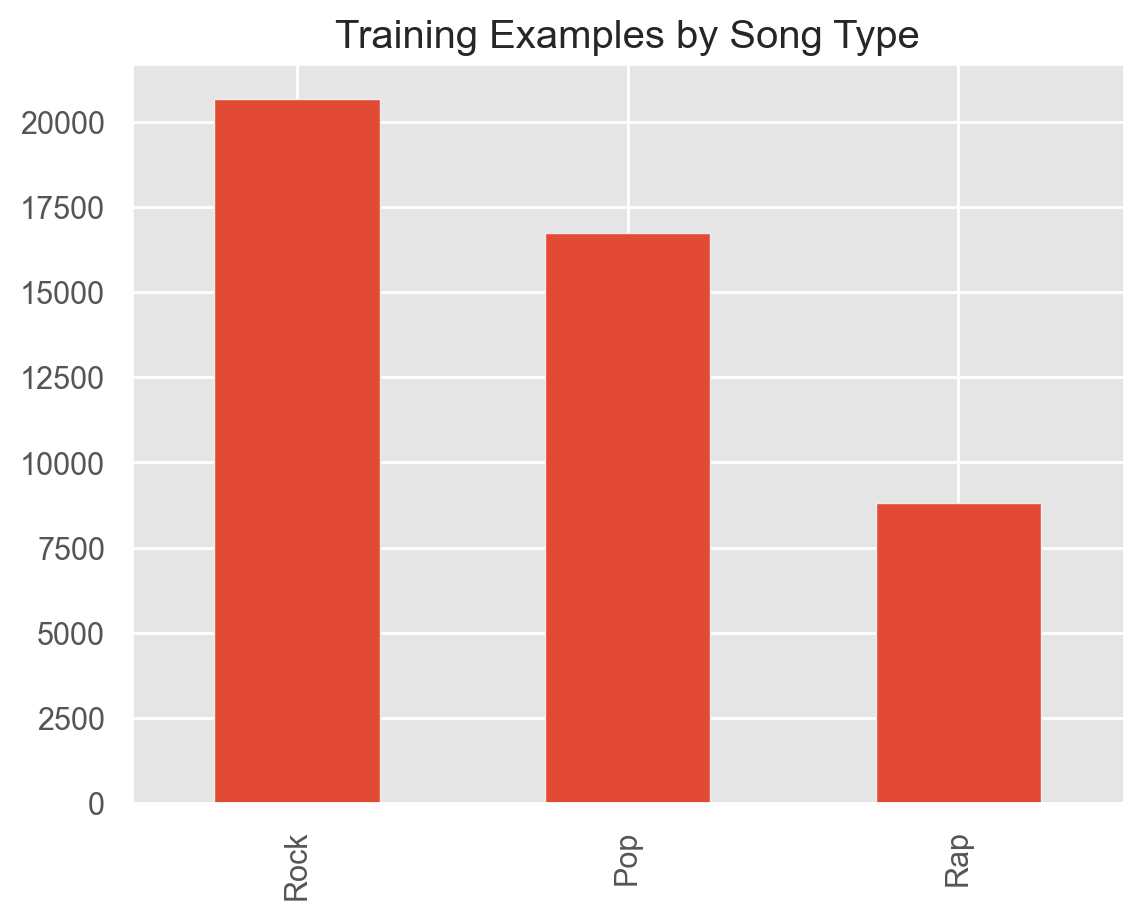

In [22]:
# Show how many training examples exist for each of the six activities
data['Type'].value_counts().plot(kind='bar',
                                   title='Training Examples by Song Type')
plt.show()

In [23]:
# Define column name of the label vector
LABEL = 'Type'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data['Type'].values.ravel())

In [24]:
set(data.Type)

{0, 1, 2}

In [25]:
print(TIME_PERIODS)
print(STEP_DISTANCE)
print(LABEL)

240
120
Type


In [26]:
data

Time  Speed  Type
0       0.0    0.0     2
1       0.0    0.0     2
2       0.1    0.0     2
3       0.1    0.0     2
4       0.1    0.0     2
...     ...    ...   ...
46185  90.6    0.0     0
46186  90.6    0.0     0
46187  90.7    0.0     0
46188  90.7    0.0     0
46189  90.7    0.0     0

[46190 rows x 3 columns]

In [27]:
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 1
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        speed_s = df['Speed'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([speed_s])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [28]:
x_train, y_train = create_segments_and_labels(data,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

/var/folders/ln/nw_wjckd3m18jq3mbxdjqtd40000gn/T/ipykernel_74194/1152842310.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]


In [29]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (383, 240, 1)
383 training samples
y_train shape:  (383,)


In [30]:
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['Pop', 'Rap', 'Rock']


In [31]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (383, 240)
input_shape: 240


In [32]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [33]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (383, 3)


In [34]:
# 1D CNN neural network
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Dropout(0.3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 240, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 231, 100)          1100      
                                                                 
 conv1d_1 (Conv1D)           (None, 222, 100)          100100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 74, 100)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 100)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 65, 160)           160160    
                          

2023-01-13 16:30:36.610236: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-13 16:30:36.610344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model_CNN/best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
]

callbacks_list = [keras.callbacks.ModelCheckpoint(
        filepath='model_CNN/best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 2000

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/2000


2023-01-13 16:30:36.867591: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-13 16:30:37.134663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 831ms/step - loss: 1.0984 - accuracy: 0.3758 - val_loss: 1.1265 - val_accuracy: 0.0000e+00
Epoch 2/2000


2023-01-13 16:30:37.600206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 211ms/step - loss: 1.0859 - accuracy: 0.5621 - val_loss: 1.1974 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 199ms/step - loss: 1.0600 - accuracy: 0.5621 - val_loss: 1.3791 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 204ms/step - loss: 1.0154 - accuracy: 0.5621 - val_loss: 1.8663 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 200ms/step - loss: 1.0172 - accuracy: 0.5621 - val_loss: 1.8893 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 194ms/step - loss: 1.0163 - accuracy: 0.5621 - val_loss: 1.7006 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 198ms/step - loss: 0.9982 - accuracy: 0.5621 - val_loss: 1.5702 - val_accuracy: 0.0000e+00
Epoch 8/2000
1/1 [==============================] - 0s 197ms/step - loss: 1.0039 - accuracy: 0.5621 - val_loss: 1.5195 - val_accuracy: 0.

Epoch 58/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.6162 - accuracy: 0.7124 - val_loss: 1.7638 - val_accuracy: 0.0000e+00
Epoch 59/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.5934 - accuracy: 0.7353 - val_loss: 1.7073 - val_accuracy: 0.0000e+00
Epoch 60/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.5906 - accuracy: 0.7157 - val_loss: 1.6602 - val_accuracy: 0.0000e+00
Epoch 61/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.5625 - accuracy: 0.7288 - val_loss: 1.6954 - val_accuracy: 0.0000e+00
Epoch 62/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.5429 - accuracy: 0.7418 - val_loss: 1.7671 - val_accuracy: 0.0000e+00
Epoch 63/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.5518 - accuracy: 0.7418 - val_loss: 1.8051 - val_accuracy: 0.0130
Epoch 64/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.5057 - accuracy: 0.7451 - val_loss: 1.7818 - 

1/1 [==============================] - 0s 189ms/step - loss: 0.1363 - accuracy: 0.9477 - val_loss: 0.6928 - val_accuracy: 0.6623
Epoch 116/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.1193 - accuracy: 0.9673 - val_loss: 1.0372 - val_accuracy: 0.5195
Epoch 117/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.1306 - accuracy: 0.9542 - val_loss: 1.0697 - val_accuracy: 0.5065
Epoch 118/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.1239 - accuracy: 0.9542 - val_loss: 0.8459 - val_accuracy: 0.5844
Epoch 119/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.1191 - accuracy: 0.9575 - val_loss: 0.7190 - val_accuracy: 0.6364
Epoch 120/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.1258 - accuracy: 0.9575 - val_loss: 0.7333 - val_accuracy: 0.6494
Epoch 121/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.1111 - accuracy: 0.9575 - val_loss: 0.8069 - val_accuracy: 0.6234
Epoch 1

Epoch 172/2000
1/1 [==============================] - 0s 195ms/step - loss: 0.0617 - accuracy: 0.9771 - val_loss: 0.8735 - val_accuracy: 0.6753
Epoch 173/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0612 - accuracy: 0.9771 - val_loss: 0.7362 - val_accuracy: 0.7143
Epoch 174/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0682 - accuracy: 0.9739 - val_loss: 0.6412 - val_accuracy: 0.7662
Epoch 175/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0708 - accuracy: 0.9641 - val_loss: 0.8653 - val_accuracy: 0.6753
Epoch 176/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0696 - accuracy: 0.9771 - val_loss: 1.0920 - val_accuracy: 0.5974
Epoch 177/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0664 - accuracy: 0.9673 - val_loss: 0.9870 - val_accuracy: 0.6494
Epoch 178/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0785 - accuracy: 0.9673 - val_loss: 0.7074 - val_accuracy:

Epoch 229/2000
1/1 [==============================] - 0s 213ms/step - loss: 0.0371 - accuracy: 0.9837 - val_loss: 0.4206 - val_accuracy: 0.8571
Epoch 230/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0726 - accuracy: 0.9739 - val_loss: 0.4232 - val_accuracy: 0.8571
Epoch 231/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0572 - accuracy: 0.9804 - val_loss: 0.7013 - val_accuracy: 0.7532
Epoch 232/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0478 - accuracy: 0.9837 - val_loss: 0.9542 - val_accuracy: 0.6364
Epoch 233/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0751 - accuracy: 0.9706 - val_loss: 0.7692 - val_accuracy: 0.7143
Epoch 234/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0392 - accuracy: 0.9804 - val_loss: 0.5077 - val_accuracy: 0.8182
Epoch 235/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0388 - accuracy: 0.9771 - val_loss: 0.4476 - val_accuracy:

Epoch 286/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0308 - accuracy: 0.9935 - val_loss: 0.6468 - val_accuracy: 0.7662
Epoch 287/2000
1/1 [==============================] - 0s 186ms/step - loss: 0.0246 - accuracy: 0.9935 - val_loss: 0.4921 - val_accuracy: 0.8571
Epoch 288/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.4298 - val_accuracy: 0.8571
Epoch 289/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.5209 - val_accuracy: 0.8571
Epoch 290/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.6280 - val_accuracy: 0.7922
Epoch 291/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0195 - accuracy: 0.9902 - val_loss: 0.6927 - val_accuracy: 0.7532
Epoch 292/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0279 - accuracy: 0.9935 - val_loss: 0.5698 - val_accuracy:

Epoch 343/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0310 - accuracy: 0.9935 - val_loss: 0.3886 - val_accuracy: 0.8961
Epoch 344/2000
1/1 [==============================] - 0s 212ms/step - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.2818 - val_accuracy: 0.8831
Epoch 345/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 0.2955 - val_accuracy: 0.8831
Epoch 346/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0141 - accuracy: 0.9935 - val_loss: 0.4414 - val_accuracy: 0.8701
Epoch 347/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0639 - accuracy: 0.9837 - val_loss: 0.6879 - val_accuracy: 0.8182
Epoch 348/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0168 - accuracy: 0.9935 - val_loss: 0.7028 - val_accuracy: 0.7792
Epoch 349/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0326 - accuracy: 0.9837 - val_loss: 0.3710 - val_accuracy:

Epoch 400/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.6479 - val_accuracy: 0.7922
Epoch 401/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.7280 - val_accuracy: 0.7662
Epoch 402/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0153 - accuracy: 0.9935 - val_loss: 0.5704 - val_accuracy: 0.8312
Epoch 403/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.4513 - val_accuracy: 0.8831
Epoch 404/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.4329 - val_accuracy: 0.8831
Epoch 405/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.8831
Epoch 406/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.4309 - val_accuracy:

Epoch 457/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5771 - val_accuracy: 0.8442
Epoch 458/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.6207 - val_accuracy: 0.8312
Epoch 459/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0234 - accuracy: 0.9967 - val_loss: 0.5899 - val_accuracy: 0.8312
Epoch 460/2000
1/1 [==============================] - 0s 185ms/step - loss: 0.0299 - accuracy: 0.9935 - val_loss: 0.4728 - val_accuracy: 0.8701
Epoch 461/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3455 - val_accuracy: 0.8961
Epoch 462/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 0.2761 - val_accuracy: 0.9091
Epoch 463/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.3162 - val_accuracy:

Epoch 514/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0070 - accuracy: 0.9967 - val_loss: 0.4249 - val_accuracy: 0.8961
Epoch 515/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0050 - accuracy: 0.9967 - val_loss: 0.4345 - val_accuracy: 0.8831
Epoch 516/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4540 - val_accuracy: 0.8831
Epoch 517/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4791 - val_accuracy: 0.8831
Epoch 518/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4953 - val_accuracy: 0.8831
Epoch 519/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0062 - accuracy: 0.9967 - val_loss: 0.4825 - val_accuracy: 0.8831
Epoch 520/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4404 - val_accuracy:

Epoch 571/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3245 - val_accuracy: 0.8961
Epoch 572/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9351
Epoch 573/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 0.1093 - val_accuracy: 0.9351
Epoch 574/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0146 - accuracy: 0.9967 - val_loss: 0.1346 - val_accuracy: 0.9351
Epoch 575/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 0.2151 - val_accuracy: 0.9221
Epoch 576/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3395 - val_accuracy: 0.8961
Epoch 577/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0066 - accuracy: 0.9967 - val_loss: 0.4870 - val_accuracy:

Epoch 628/2000
1/1 [==============================] - 0s 195ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3084 - val_accuracy: 0.9091
Epoch 629/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2939 - val_accuracy: 0.9091
Epoch 630/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2886 - val_accuracy: 0.9221
Epoch 631/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 0.9221
Epoch 632/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2675 - val_accuracy: 0.9221
Epoch 633/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0050 - accuracy: 0.9967 - val_loss: 0.2585 - val_accuracy: 0.9221
Epoch 634/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2684 - val_accuracy:

Epoch 685/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2500 - val_accuracy: 0.9221
Epoch 686/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 0.9221
Epoch 687/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2915 - val_accuracy: 0.9221
Epoch 688/2000
1/1 [==============================] - 0s 188ms/step - loss: 8.8204e-04 - accuracy: 1.0000 - val_loss: 0.3229 - val_accuracy: 0.9221
Epoch 689/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3707 - val_accuracy: 0.8961
Epoch 690/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0056 - accuracy: 0.9967 - val_loss: 0.3754 - val_accuracy: 0.8961
Epoch 691/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3667 - val_accur

1/1 [==============================] - 0s 189ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3462 - val_accuracy: 0.9221
Epoch 742/2000
1/1 [==============================] - 0s 188ms/step - loss: 9.5963e-04 - accuracy: 1.0000 - val_loss: 0.3761 - val_accuracy: 0.9091
Epoch 743/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4282 - val_accuracy: 0.8831
Epoch 744/2000
1/1 [==============================] - 0s 188ms/step - loss: 3.9691e-04 - accuracy: 1.0000 - val_loss: 0.4863 - val_accuracy: 0.8701
Epoch 745/2000
1/1 [==============================] - 0s 189ms/step - loss: 4.3556e-04 - accuracy: 1.0000 - val_loss: 0.5301 - val_accuracy: 0.8701
Epoch 746/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4779 - val_accuracy: 0.8831
Epoch 747/2000
1/1 [==============================] - 0s 186ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4135 - val_accuracy: 0.

1/1 [==============================] - 0s 192ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4837 - val_accuracy: 0.8831
Epoch 798/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.8831
Epoch 799/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4846 - val_accuracy: 0.8831
Epoch 800/2000
1/1 [==============================] - 0s 190ms/step - loss: 5.1731e-04 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.8961
Epoch 801/2000
1/1 [==============================] - 0s 190ms/step - loss: 8.4731e-04 - accuracy: 1.0000 - val_loss: 0.4214 - val_accuracy: 0.8961
Epoch 802/2000
1/1 [==============================] - 0s 188ms/step - loss: 6.8361e-04 - accuracy: 1.0000 - val_loss: 0.3948 - val_accuracy: 0.8961
Epoch 803/2000
1/1 [==============================] - 0s 188ms/step - loss: 5.2915e-04 - accuracy: 1.0000 - val_loss: 0.3711 - val_accuracy

1/1 [==============================] - 0s 188ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4307 - val_accuracy: 0.8961
Epoch 854/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 0.8961
Epoch 855/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2666 - val_accuracy: 0.9091
Epoch 856/2000
1/1 [==============================] - 0s 191ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 0.9351
Epoch 857/2000
1/1 [==============================] - 0s 189ms/step - loss: 4.6791e-04 - accuracy: 1.0000 - val_loss: 0.2208 - val_accuracy: 0.9351
Epoch 858/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.9351
Epoch 859/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2117 - val_accuracy: 0.9351
Epo

1/1 [==============================] - 0s 188ms/step - loss: 3.5241e-04 - accuracy: 1.0000 - val_loss: 0.4612 - val_accuracy: 0.8961
Epoch 910/2000
1/1 [==============================] - 0s 187ms/step - loss: 3.6230e-04 - accuracy: 1.0000 - val_loss: 0.4720 - val_accuracy: 0.8961
Epoch 911/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4074 - val_accuracy: 0.8961
Epoch 912/2000
1/1 [==============================] - 0s 188ms/step - loss: 5.4753e-04 - accuracy: 1.0000 - val_loss: 0.3600 - val_accuracy: 0.9091
Epoch 913/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3000 - val_accuracy: 0.9091
Epoch 914/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0027 - accuracy: 0.9967 - val_loss: 0.2989 - val_accuracy: 0.9091
Epoch 915/2000
1/1 [==============================] - 0s 188ms/step - loss: 9.8568e-04 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy

1/1 [==============================] - 0s 201ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9351
Epoch 966/2000
1/1 [==============================] - 0s 195ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2589 - val_accuracy: 0.9221
Epoch 967/2000
1/1 [==============================] - 0s 201ms/step - loss: 3.7307e-04 - accuracy: 1.0000 - val_loss: 0.3226 - val_accuracy: 0.9221
Epoch 968/2000
1/1 [==============================] - 0s 197ms/step - loss: 3.8382e-04 - accuracy: 1.0000 - val_loss: 0.3768 - val_accuracy: 0.9091
Epoch 969/2000
1/1 [==============================] - 0s 195ms/step - loss: 4.3831e-04 - accuracy: 1.0000 - val_loss: 0.4255 - val_accuracy: 0.9091
Epoch 970/2000
1/1 [==============================] - 0s 188ms/step - loss: 3.7979e-04 - accuracy: 1.0000 - val_loss: 0.4589 - val_accuracy: 0.8961
Epoch 971/2000
1/1 [==============================] - 0s 194ms/step - loss: 9.4560e-04 - accuracy: 1.0000 - val_loss: 0.4432 - val_accu

Epoch 1021/2000
1/1 [==============================] - 0s 199ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2709 - val_accuracy: 0.9221
Epoch 1022/2000
1/1 [==============================] - 0s 201ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2066 - val_accuracy: 0.9351
Epoch 1023/2000
1/1 [==============================] - 0s 194ms/step - loss: 2.3930e-04 - accuracy: 1.0000 - val_loss: 0.1583 - val_accuracy: 0.9351
Epoch 1024/2000
1/1 [==============================] - 0s 203ms/step - loss: 8.2904e-04 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9351
Epoch 1025/2000
1/1 [==============================] - 0s 197ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1648 - val_accuracy: 0.9351
Epoch 1026/2000
1/1 [==============================] - 0s 190ms/step - loss: 5.2361e-04 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9351
Epoch 1027/2000
1/1 [==============================] - 0s 201ms/step - loss: 3.8019e-04 - accuracy: 1.0000 - val_loss:

1/1 [==============================] - 0s 204ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2246 - val_accuracy: 0.9351
Epoch 1077/2000
1/1 [==============================] - 0s 190ms/step - loss: 6.0412e-04 - accuracy: 1.0000 - val_loss: 0.2336 - val_accuracy: 0.9351
Epoch 1078/2000
1/1 [==============================] - 0s 189ms/step - loss: 4.8464e-04 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9351
Epoch 1079/2000
1/1 [==============================] - 0s 191ms/step - loss: 4.0978e-04 - accuracy: 1.0000 - val_loss: 0.2802 - val_accuracy: 0.9221
Epoch 1080/2000
1/1 [==============================] - 0s 195ms/step - loss: 3.5922e-04 - accuracy: 1.0000 - val_loss: 0.3201 - val_accuracy: 0.9221
Epoch 1081/2000
1/1 [==============================] - 0s 189ms/step - loss: 1.7672e-04 - accuracy: 1.0000 - val_loss: 0.3562 - val_accuracy: 0.9221
Epoch 1082/2000
1/1 [==============================] - 0s 188ms/step - loss: 7.8292e-04 - accuracy: 1.0000 - val_loss: 0.3631 

1/1 [==============================] - 0s 187ms/step - loss: 2.8612e-04 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9351
Epoch 1132/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 0.1222 - val_accuracy: 0.9351
Epoch 1133/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0051 - accuracy: 0.9967 - val_loss: 0.0744 - val_accuracy: 0.9610
Epoch 1134/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9351
Epoch 1135/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.9351
Epoch 1136/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3827 - val_accuracy: 0.9221
Epoch 1137/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.5815 - val_accuracy: 0.90

1/1 [==============================] - 0s 190ms/step - loss: 0.0436 - accuracy: 0.9837 - val_loss: 0.0803 - val_accuracy: 0.9610
Epoch 1188/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0385 - accuracy: 0.9902 - val_loss: 0.0805 - val_accuracy: 0.9610
Epoch 1189/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0360 - accuracy: 0.9869 - val_loss: 0.0797 - val_accuracy: 0.9610
Epoch 1190/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0461 - accuracy: 0.9837 - val_loss: 0.0701 - val_accuracy: 0.9610
Epoch 1191/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0375 - accuracy: 0.9869 - val_loss: 0.0613 - val_accuracy: 0.9610
Epoch 1192/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0332 - accuracy: 0.9837 - val_loss: 0.0480 - val_accuracy: 0.9870
Epoch 1193/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0339 - accuracy: 0.9902 - val_loss: 0.0452 - val_accuracy: 0.9870
E

1/1 [==============================] - 0s 187ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0534 - val_accuracy: 0.9870
Epoch 1244/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9740
Epoch 1245/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9740
Epoch 1246/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0926 - val_accuracy: 0.9481
Epoch 1247/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9351
Epoch 1248/2000
1/1 [==============================] - 0s 192ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.1006 - val_accuracy: 0.9481
Epoch 1249/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0115 - accuracy: 0.9935 - val_loss: 0.0809 - val_accuracy: 0.9740
E

1/1 [==============================] - 0s 188ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9740
Epoch 1300/2000
1/1 [==============================] - 0s 213ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9610
Epoch 1301/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9481
Epoch 1302/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9481
Epoch 1303/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.0980 - val_accuracy: 0.9481
Epoch 1304/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0065 - accuracy: 0.9967 - val_loss: 0.0829 - val_accuracy: 0.9610
Epoch 1305/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9740
E

1/1 [==============================] - 0s 188ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9870
Epoch 1356/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 1357/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9870
Epoch 1358/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9740
Epoch 1359/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9740
Epoch 1360/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9740
Epoch 1361/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0053 - accuracy: 0.9967 - val_loss: 0.0516 - val_accuracy: 0.9740
E

1/1 [==============================] - 0s 205ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 1412/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 1413/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 0.9870
Epoch 1414/2000
1/1 [==============================] - 0s 192ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9870
Epoch 1415/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0041 - accuracy: 0.9967 - val_loss: 0.0224 - val_accuracy: 0.9870
Epoch 1416/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9870
Epoch 1417/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9870
E

1/1 [==============================] - 0s 188ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 1468/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9740
Epoch 1469/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9740
Epoch 1470/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9740
Epoch 1471/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9740
Epoch 1472/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 1473/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9870
E

1/1 [==============================] - 0s 188ms/step - loss: 8.3404e-04 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9610
Epoch 1524/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9610
Epoch 1525/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9740
Epoch 1526/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0078 - accuracy: 0.9967 - val_loss: 0.0488 - val_accuracy: 0.9740
Epoch 1527/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9870
Epoch 1528/2000
1/1 [==============================] - 0s 189ms/step - loss: 9.7621e-04 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9870
Epoch 1529/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 

1/1 [==============================] - 0s 188ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9740
Epoch 1580/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9870
Epoch 1581/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 0.9870
Epoch 1582/2000
1/1 [==============================] - 0s 190ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9870
Epoch 1583/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 1584/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 1585/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
E

1/1 [==============================] - 0s 189ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 1636/2000
1/1 [==============================] - 0s 187ms/step - loss: 3.1764e-04 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 1637/2000
1/1 [==============================] - 0s 194ms/step - loss: 3.3317e-04 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 1638/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9870
Epoch 1639/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 0.9870
Epoch 1640/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9870
Epoch 1641/2000
1/1 [==============================] - 0s 188ms/step - loss: 7.5252e-04 - accuracy: 1.0000 - val_loss: 0.0280 - val_accura

Epoch 1691/2000
1/1 [==============================] - 0s 188ms/step - loss: 3.8511e-04 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 0.9870
Epoch 1692/2000
1/1 [==============================] - 0s 189ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9870
Epoch 1693/2000
1/1 [==============================] - 0s 188ms/step - loss: 9.4530e-04 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9740
Epoch 1694/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9610
Epoch 1695/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9740
Epoch 1696/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9740
Epoch 1697/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0503 

Epoch 1747/2000
1/1 [==============================] - 0s 189ms/step - loss: 6.6173e-04 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1748/2000
1/1 [==============================] - 0s 187ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9870
Epoch 1749/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 1750/2000
1/1 [==============================] - 0s 188ms/step - loss: 7.4604e-04 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9740
Epoch 1751/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9740
Epoch 1752/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9740
Epoch 1753/2000
1/1 [==============================] - 0s 187ms/step - loss: 7.5917e-04 - accuracy: 1.0000 - val_loss: 0.0

1/1 [==============================] - 0s 187ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 1803/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 1804/2000
1/1 [==============================] - 0s 191ms/step - loss: 6.0386e-04 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 1805/2000
1/1 [==============================] - 0s 196ms/step - loss: 0.0047 - accuracy: 0.9967 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 1806/2000
1/1 [==============================] - 0s 188ms/step - loss: 5.1046e-04 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 1807/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 1808/2000
1/1 [==============================] - 0s 188ms/step - loss: 5.4392e-04 - accuracy: 1.0000 - val_loss: 0.0227 - val_accura

1/1 [==============================] - 0s 187ms/step - loss: 3.6854e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 1858/2000
1/1 [==============================] - 0s 187ms/step - loss: 6.7809e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 1859/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 1860/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0042 - accuracy: 0.9967 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 1861/2000
1/1 [==============================] - 0s 189ms/step - loss: 4.2682e-04 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9870
Epoch 1862/2000
1/1 [==============================] - 0s 195ms/step - loss: 4.1088e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9740
Epoch 1863/2000
1/1 [==============================] - 0s 188ms/step - loss: 1.9227e-04 - accuracy: 1.0000 - val_loss: 0.0602 - va

1/1 [==============================] - 0s 187ms/step - loss: 3.8942e-04 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9740
Epoch 1913/2000
1/1 [==============================] - 0s 188ms/step - loss: 2.2152e-04 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9740
Epoch 1914/2000
1/1 [==============================] - 0s 187ms/step - loss: 3.5050e-04 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9740
Epoch 1915/2000
1/1 [==============================] - 0s 188ms/step - loss: 5.8886e-04 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9740
Epoch 1916/2000
1/1 [==============================] - 0s 187ms/step - loss: 2.9639e-04 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9610
Epoch 1917/2000
1/1 [==============================] - 0s 188ms/step - loss: 2.9984e-04 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9610
Epoch 1918/2000
1/1 [==============================] - 0s 187ms/step - loss: 7.8864e-04 - accuracy: 1.0000 - val_loss: 0.0

1/1 [==============================] - 0s 187ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 1968/2000
1/1 [==============================] - 0s 187ms/step - loss: 3.9656e-04 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 1969/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 1970/2000
1/1 [==============================] - 0s 187ms/step - loss: 2.3140e-04 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 1971/2000
1/1 [==============================] - 0s 187ms/step - loss: 5.3509e-04 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 1972/2000
1/1 [==============================] - 0s 188ms/step - loss: 3.8111e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 1973/2000
1/1 [==============================] - 0s 187ms/step - loss: 6.7626e-04 - accuracy: 1.0000 - val_loss: 0.0154 - va

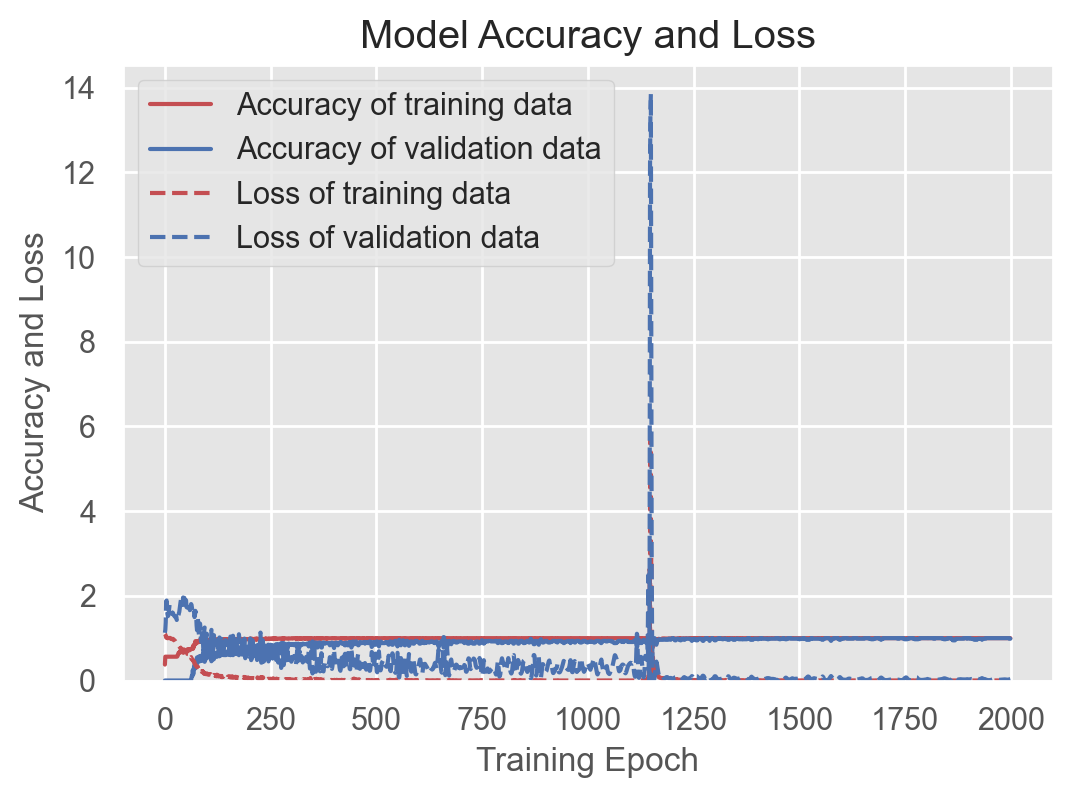

12/12 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       138
         1.0       0.99      1.00      0.99        73
         2.0       1.00      1.00      1.00       172

    accuracy                           1.00       383
   macro avg       1.00      1.00      1.00       383
weighted avg       1.00      1.00      1.00       383



2023-01-13 16:37:01.368327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [36]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))


## Check Against Test Data

Let's continue with this model and see how it performs against the test data that we have held back earlier.

In [37]:
datas = []
datas.append(data7)
datas.append(data8)
datas.append(data9)

data_test = pd.concat(datas, ignore_index=True)
x_test, y_test = create_segments_and_labels(data_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

# Set input_shape / reshape for Keras
x_test = x_test.reshape(x_test.shape[0], input_shape)

x_test = x_test.astype('float32')

np.place(y_test, y_test == 'Pop', '0')

/var/folders/ln/nw_wjckd3m18jq3mbxdjqtd40000gn/T/ipykernel_74194/1152842310.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]
/Users/ted/anaconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/ln/nw_wjckd3m18jq3mbxdjqtd40000gn/T/ipykernel_74194/1152842310.py:13: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be remov

In [38]:
y_test = y_test.astype('float32')

y_test = np_utils.to_categorical(y_test, num_classes)

score = model_m.evaluate(x_test, y_test, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

6/6 [==============================] - 0s 17ms/step - loss: 0.0591 - accuracy: 0.9885

Accuracy on test data: 0.99

Loss on test data: 0.06
